# How does Israelis and Palestinians think about different social issues?

#### Data from World Values Survey. Wave 4 for Israel (2001, N= 1099), Wave 6 for Palestine (2013, N=933). Missing answers (don't know/don't answer) has been eliminated for simplicity. 
#### A bias towards high-educated people is presented in the general sample. Weighting measures have not yet been applied to ensure a more balanced sampling.
#### Please note that any of the information provided here is directly suitable of any causal analysis.

#### 1. Data

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

user = os.getenv("username").lower()

dfpal = pd.read_excel('https://github.com/mrgdata/Personal-projects/raw/main/datasets/F00007675-WV6_Data_Palestine_ExcelTxt_v20201117.xlsx')

dfisr = pd.read_excel('https://github.com/mrgdata/Personal-projects/raw/main/datasets/F00007157-WV4_Data_Israel_ExcelTxt_v20201117.xlsx')

column_list = ['Justifiable: Homosexuality',
               'Justifiable: Abortion',
               'Justifiable: Divorce',
               'Important child qualities: obedience',
               'Important child qualities: tolerance and respect for other people',
               'Important child qualities: religious faith',
               'Highest educational level',
               'Sex',
               'Social class (subjective)',
               'Age recoded (3 intervals)',
               'C_COW_ALPHA']

dict_educpal = {
    'University - level education, with degree': 'Higher',
    'Some university-level education, without degree': 'Higher',
    'Complete secondary school: university-preparatory type': 'Higher',
    'Complete secondary school: technical/ vocational type': 'Middle',
    'Incomplete secondary school: technical/ vocational type': 'Middle',
    'Incomplete secondary school: university-preparatory type': 'Higher',
    'Complete primary school': 'Lower',
    'Incomplete primary school': 'Lower',
    'No formal education': 'Lower'}

C:\Users\mromg\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\mromg\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### 2. Editing and selection of variables

In [26]:
dataframes = [dfpal, dfisr]

for i, df in enumerate(dataframes):

    filtered_columns = [col for col in df.columns if any(string in col for string in column_list)]

    df = df[filtered_columns]
    
    df.columns = [col[4:] for col in df.columns]

    df.columns = [col if not col.startswith(':') else col[1:] for col in df.columns]

    df.columns = [col if not col.startswith(' ') else col[1:] for col in df.columns]
    
    dataframes[i] = df
    
dfpal, dfisr = dataframes

In [27]:
dfisr.drop(columns=['Highest educational levell: Respondent', 'CS: Highest educational level: Respondent (country Specific)'], inplace=True)
dfisr.rename(columns={'R: Highest educational level: Respondent (recoded into 3 groups)': 'Highest educational level attained'}, inplace=True)

dfpal['Highest educational level attained'] = dfpal['Highest educational level attained'].apply(lambda x: dict_educpal[x])

In [28]:
df = pd.concat([dfpal, dfisr])

df = df[~df.isin(['Don´t know', 'No answer']).any(axis=1)]

df.rename(columns={'W_ALPHA: Country code CoW alpha': 'Country', 'R2: Age recoded (3 intervals)': 'Age group'}, inplace=True)

df.sort_values(by='Country', ascending=True, inplace=True)

df['Country'] = df['Country'].apply(lambda x: 'Israel' if x == 'ISR' else 'Palestine')

df['Social class (subjective)'] = df['Social class (subjective)'].apply(lambda x: 'Lower middle class' if x == 'Working class' else x)

In [29]:
print(df.info())
for col in df.columns:
    print(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 91 to 0
Data columns (total 11 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Country                                                            2032 non-null   object
 1   Important child qualities: tolerance and respect for other people  2032 non-null   object
 2   Important child qualities: religious faith                         2032 non-null   object
 3   Important child qualities: obedience                               2032 non-null   object
 4   Justifiable: Homosexuality                                         2032 non-null   object
 5   Justifiable: Abortion                                              2032 non-null   object
 6   Justifiable: Divorce                                               2032 non-null   object
 7   Social class (subjective)          

#### 3. Plots

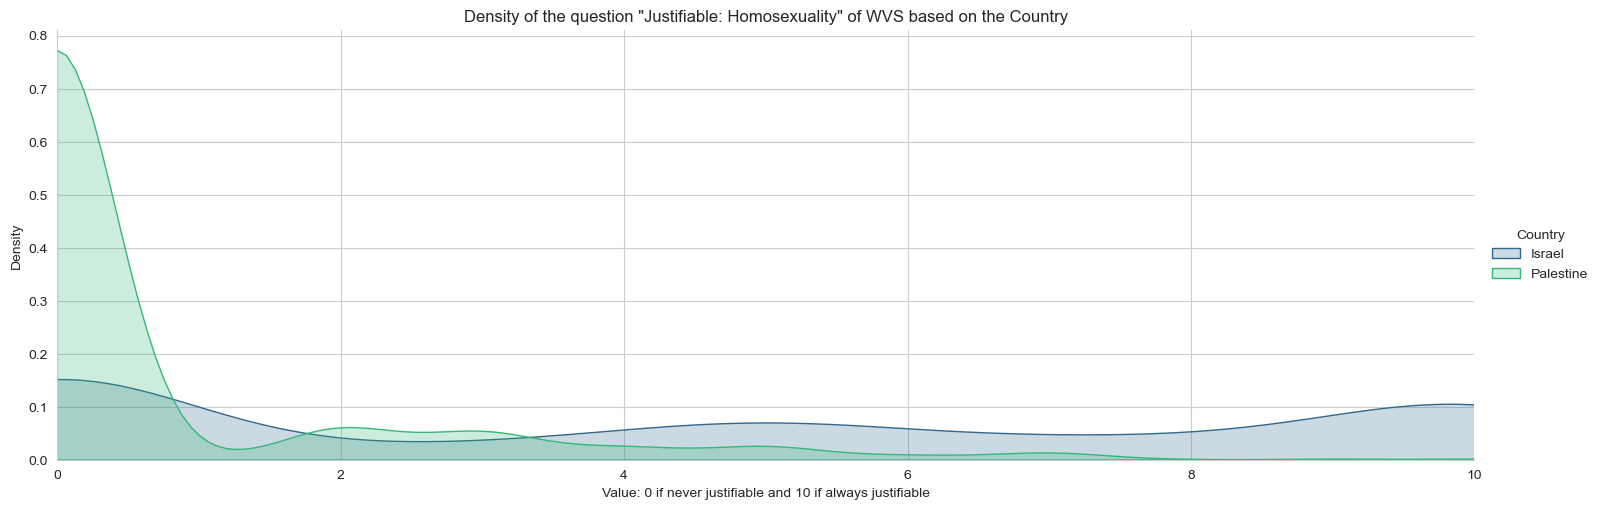

<Figure size 640x480 with 0 Axes>

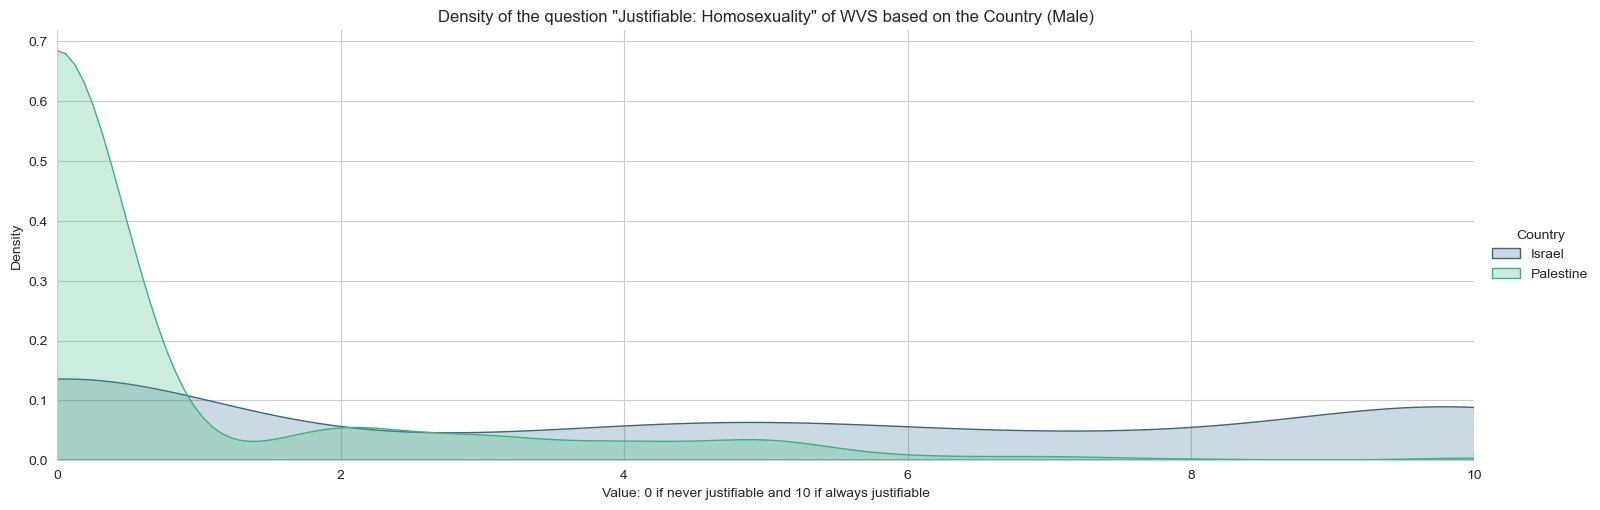

<Figure size 640x480 with 0 Axes>

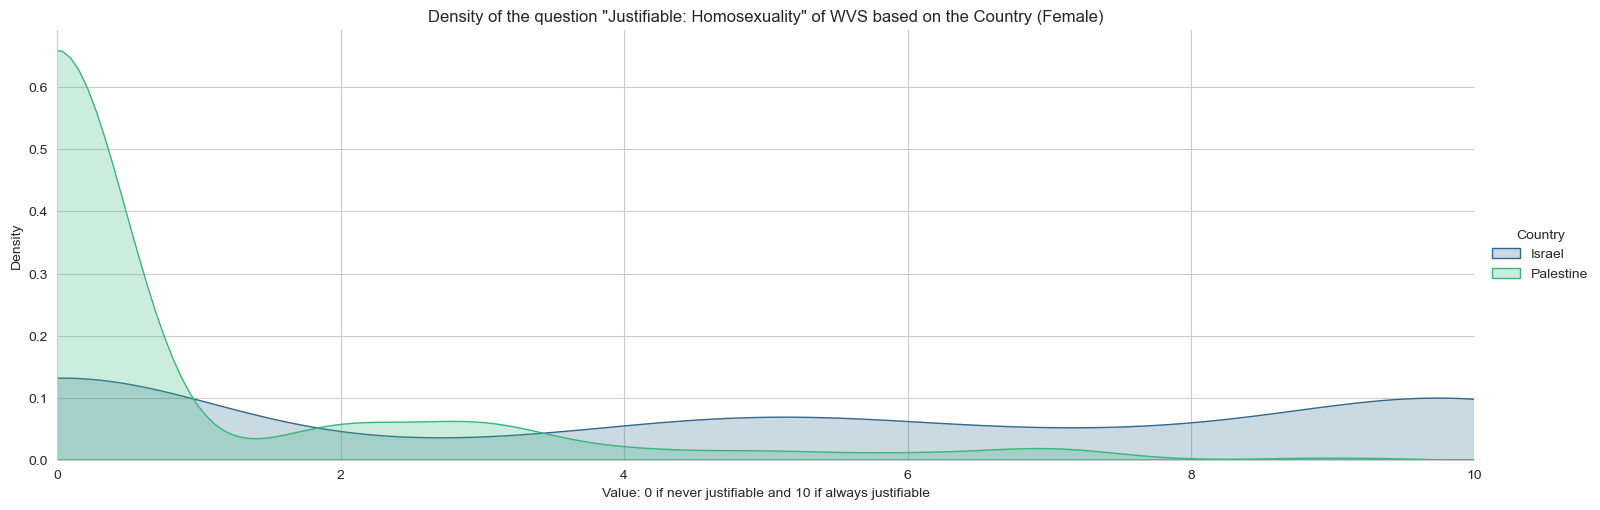

<Figure size 640x480 with 0 Axes>

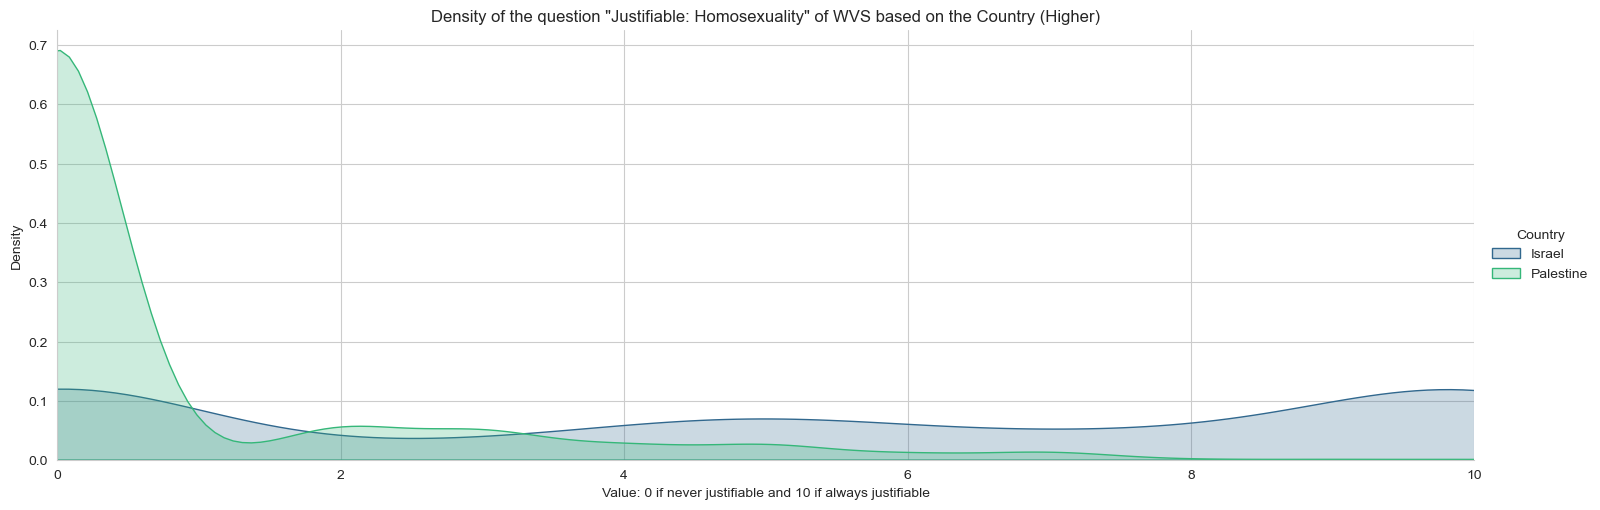

<Figure size 640x480 with 0 Axes>

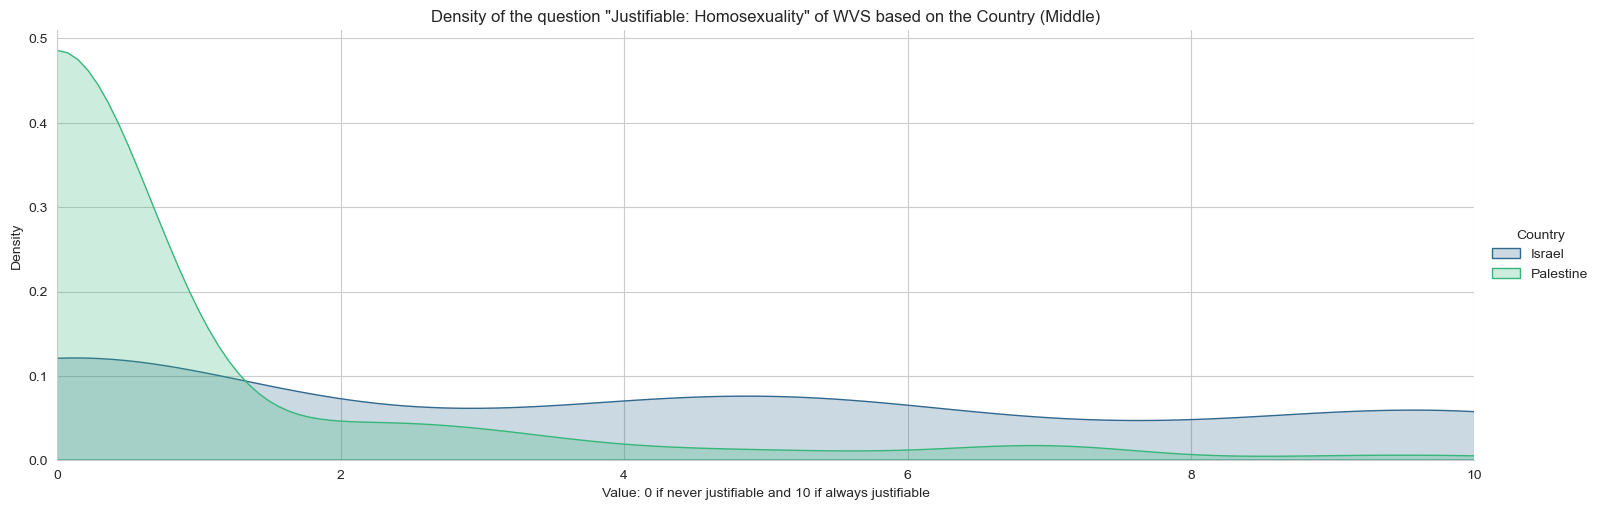

<Figure size 640x480 with 0 Axes>

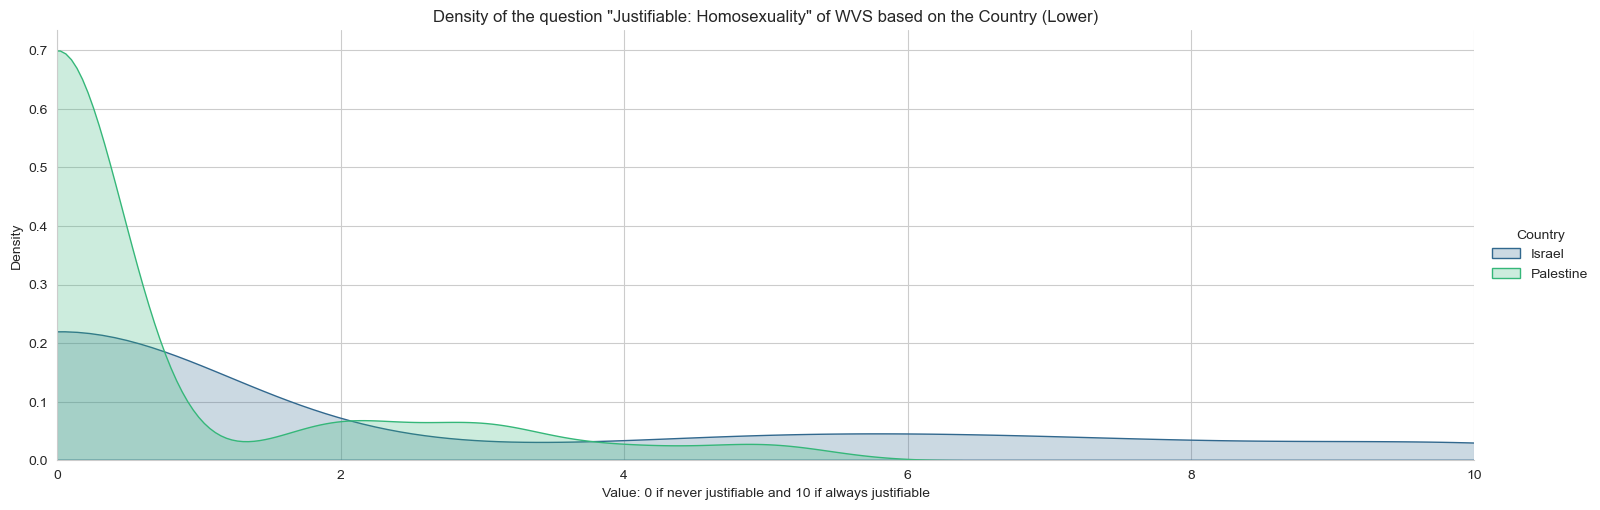

<Figure size 640x480 with 0 Axes>

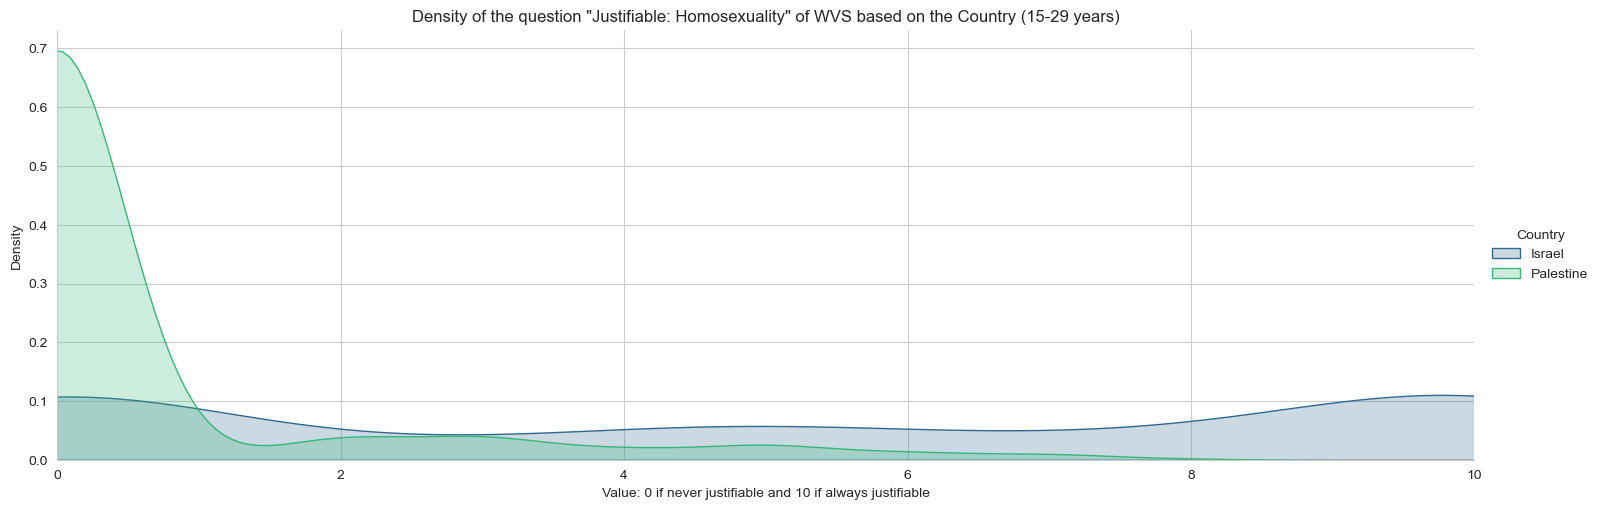

<Figure size 640x480 with 0 Axes>

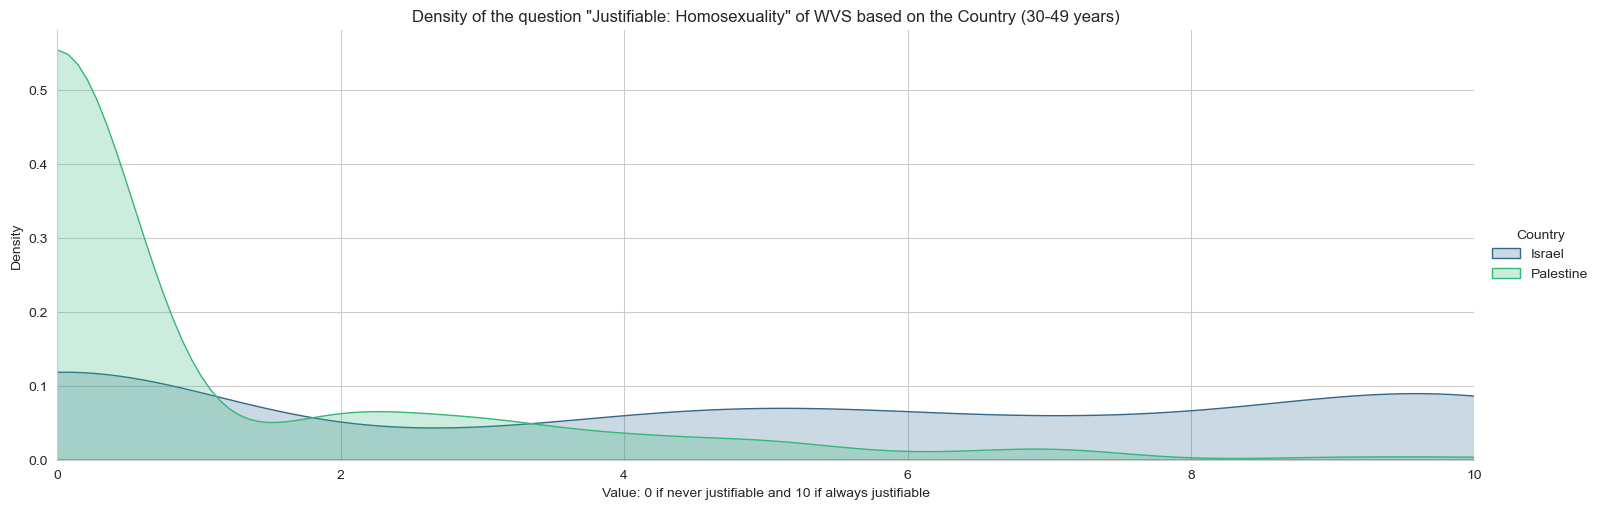

<Figure size 640x480 with 0 Axes>

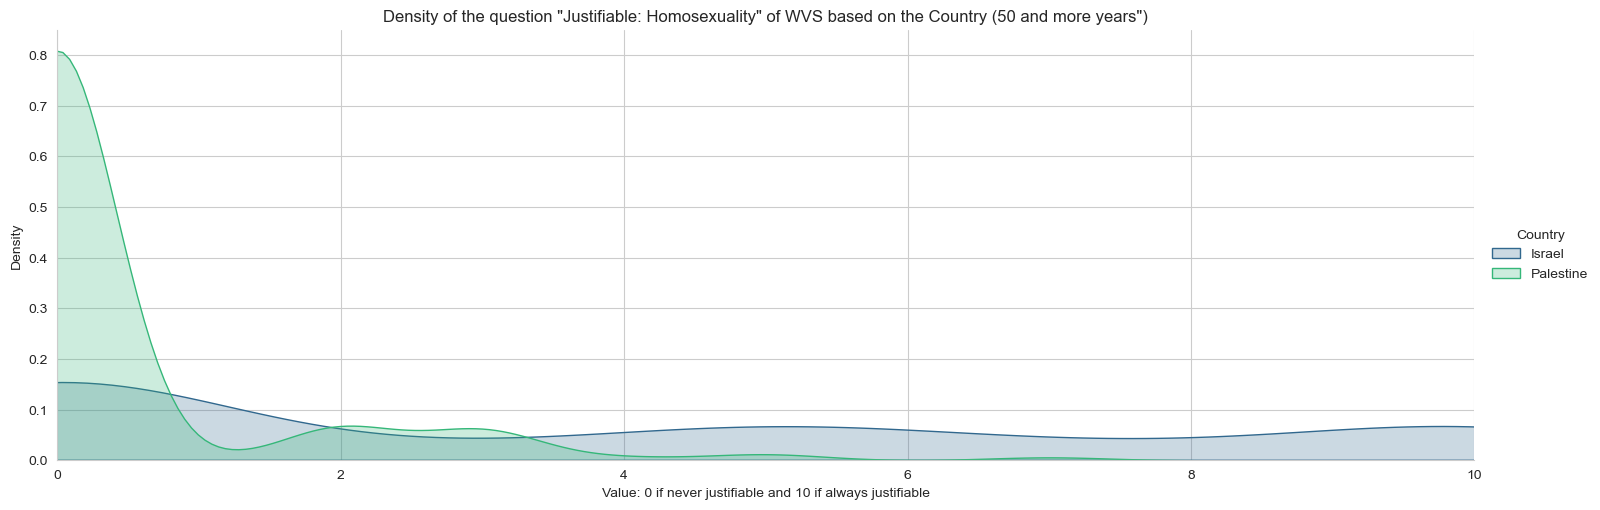

<Figure size 640x480 with 0 Axes>

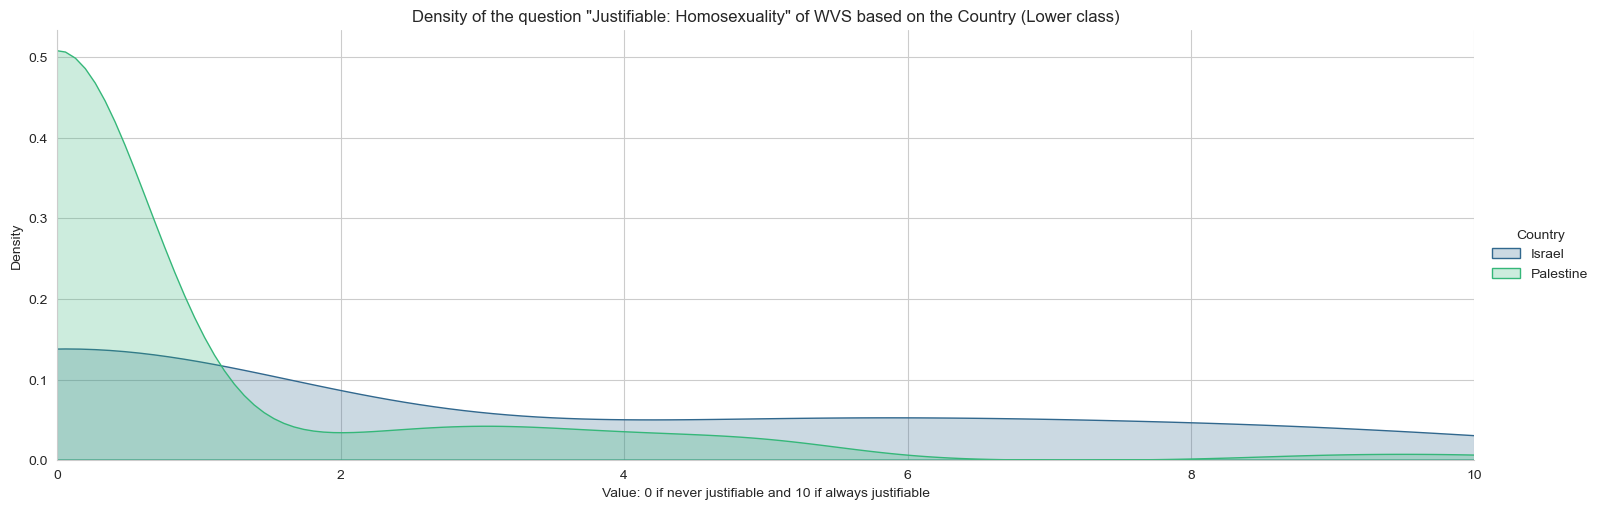

<Figure size 640x480 with 0 Axes>

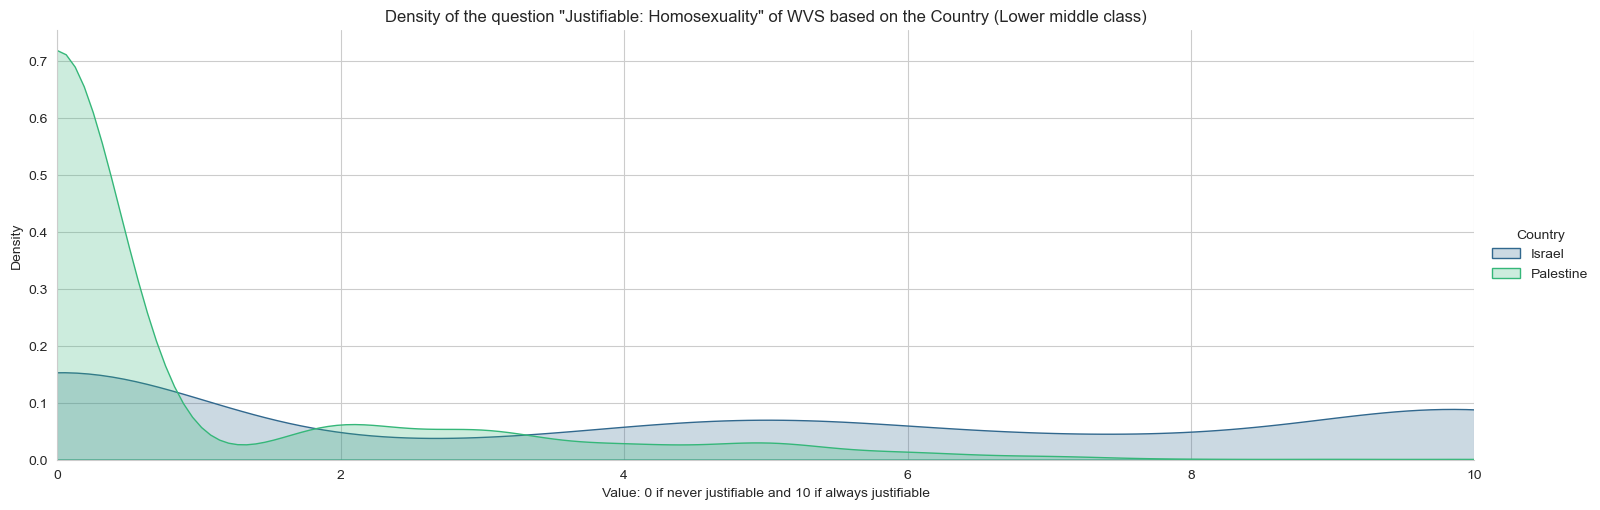

<Figure size 640x480 with 0 Axes>

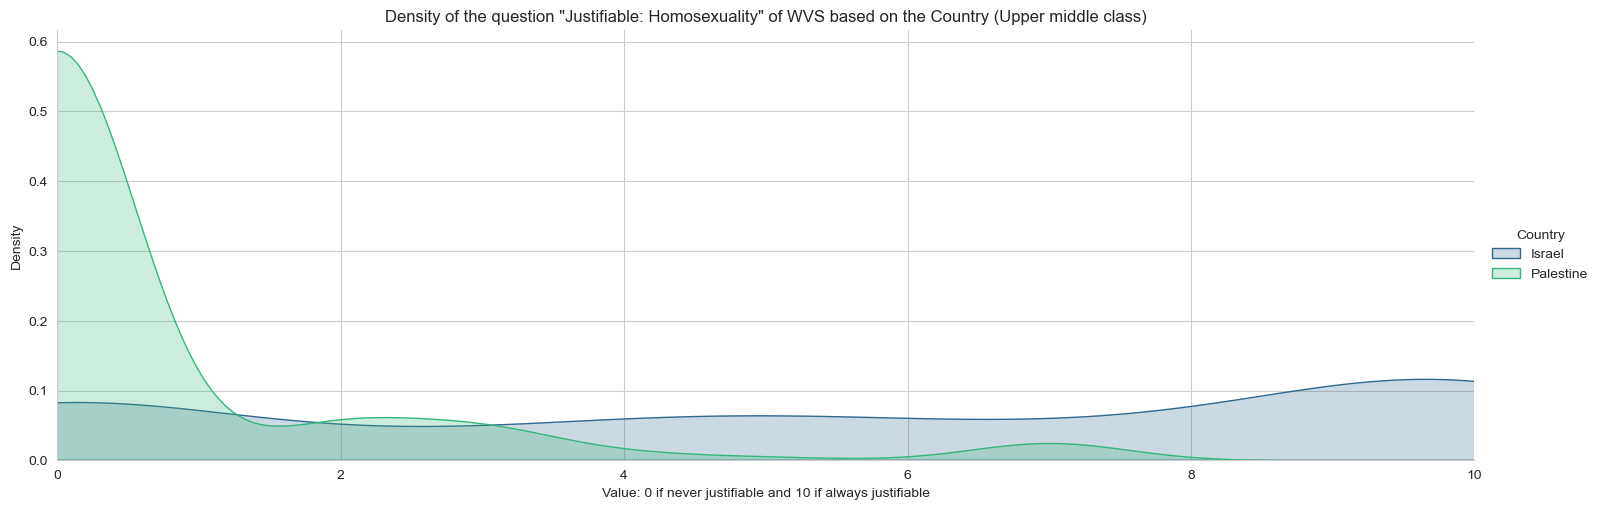

<Figure size 640x480 with 0 Axes>

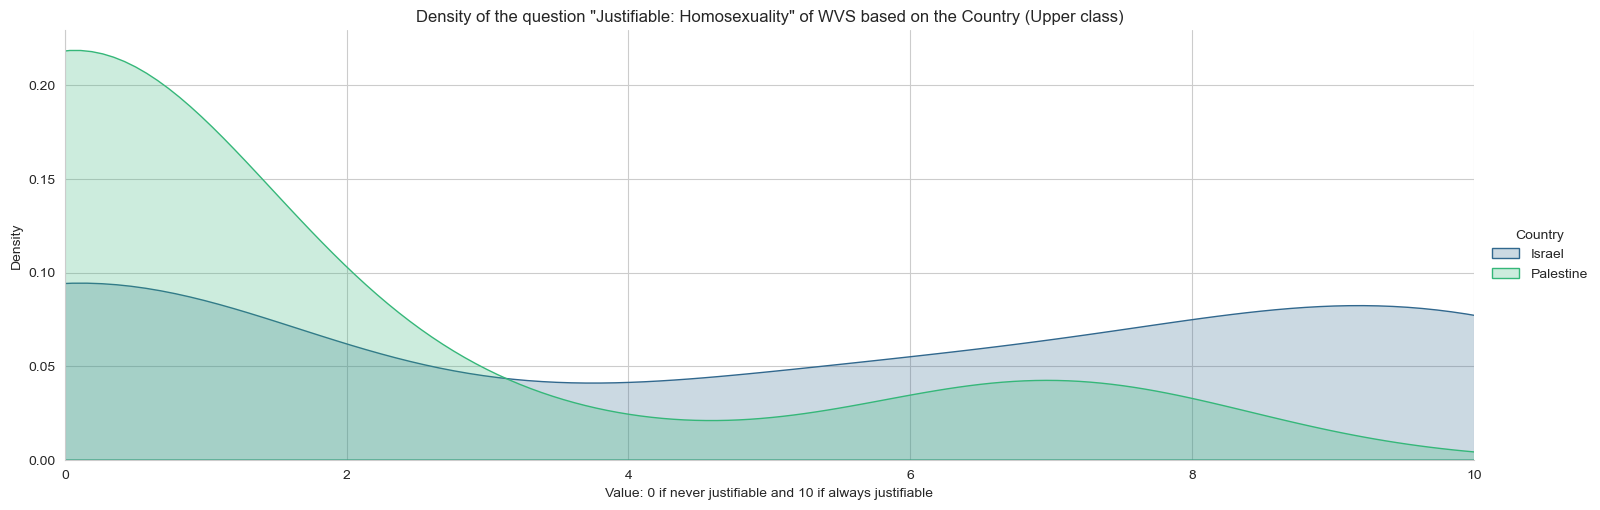

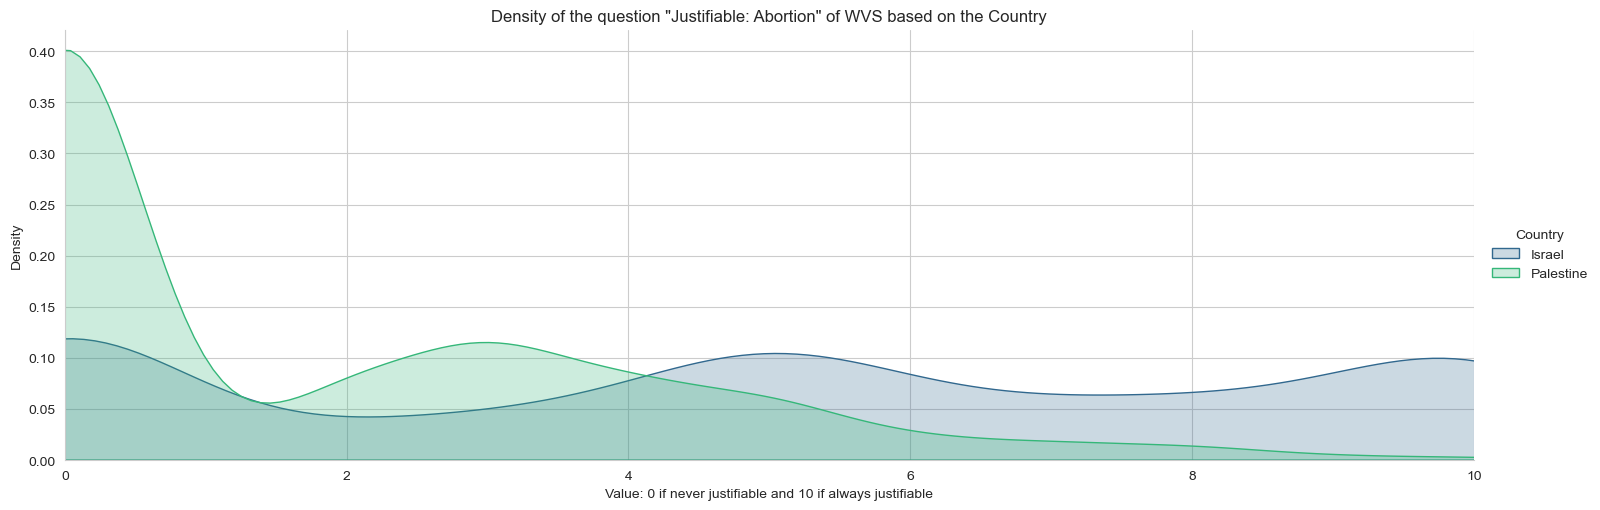

<Figure size 640x480 with 0 Axes>

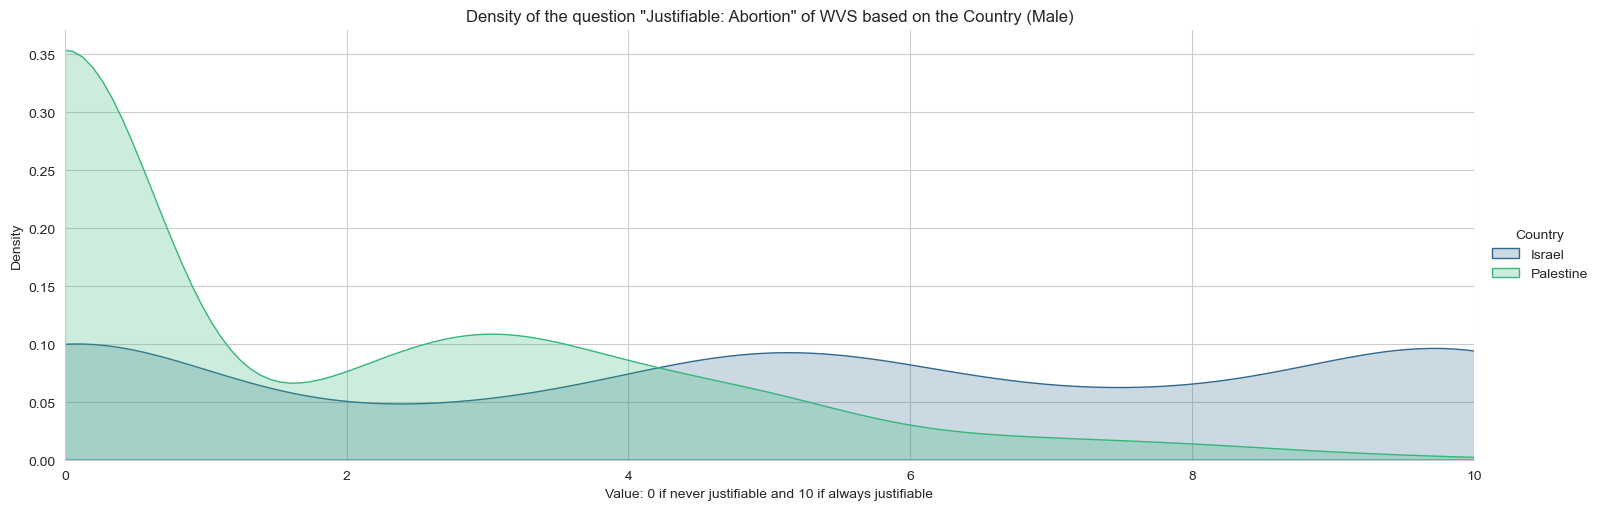

<Figure size 640x480 with 0 Axes>

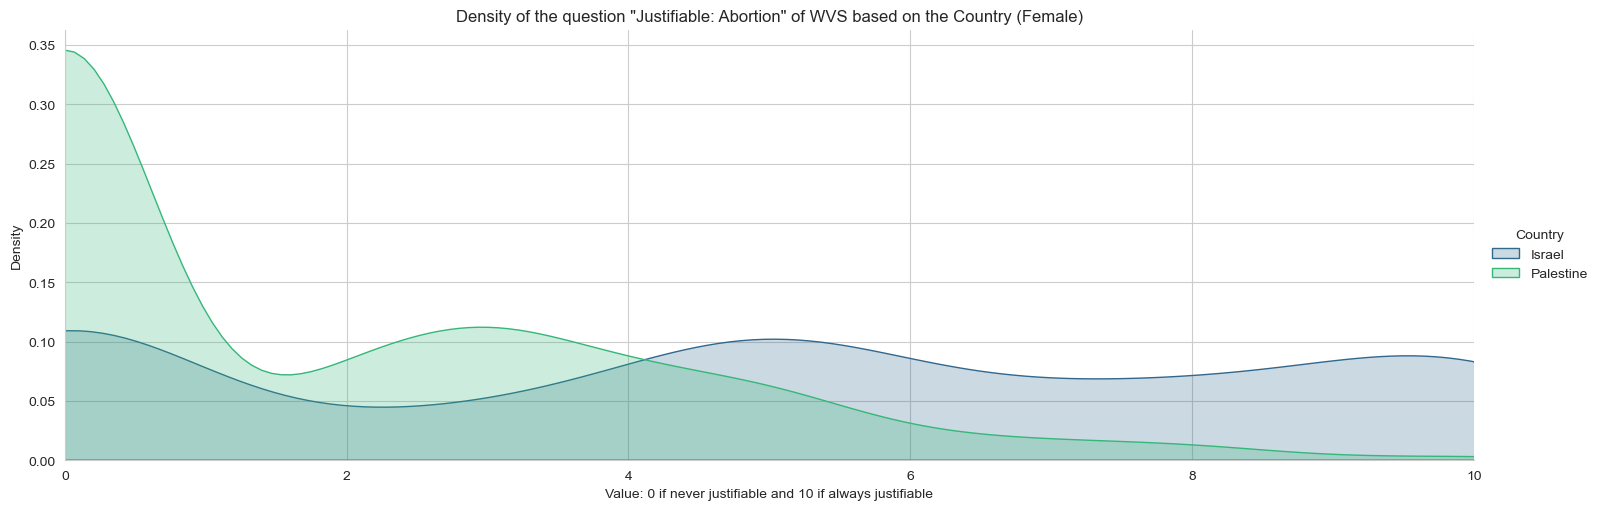

<Figure size 640x480 with 0 Axes>

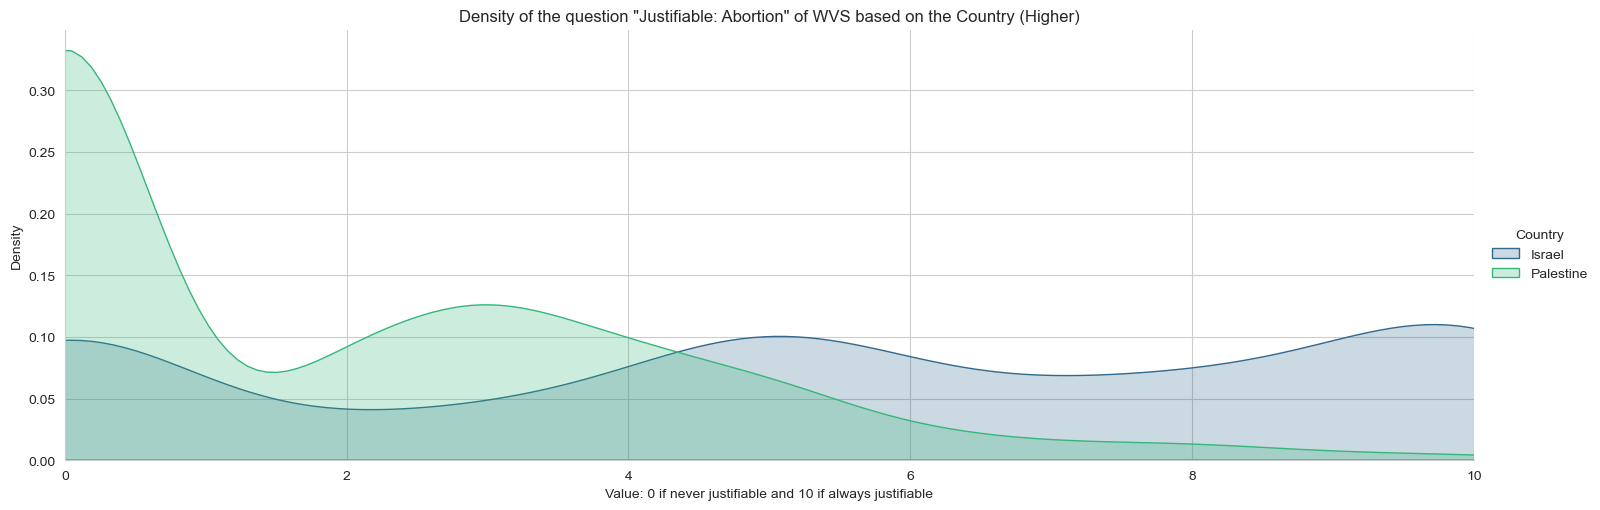

<Figure size 640x480 with 0 Axes>

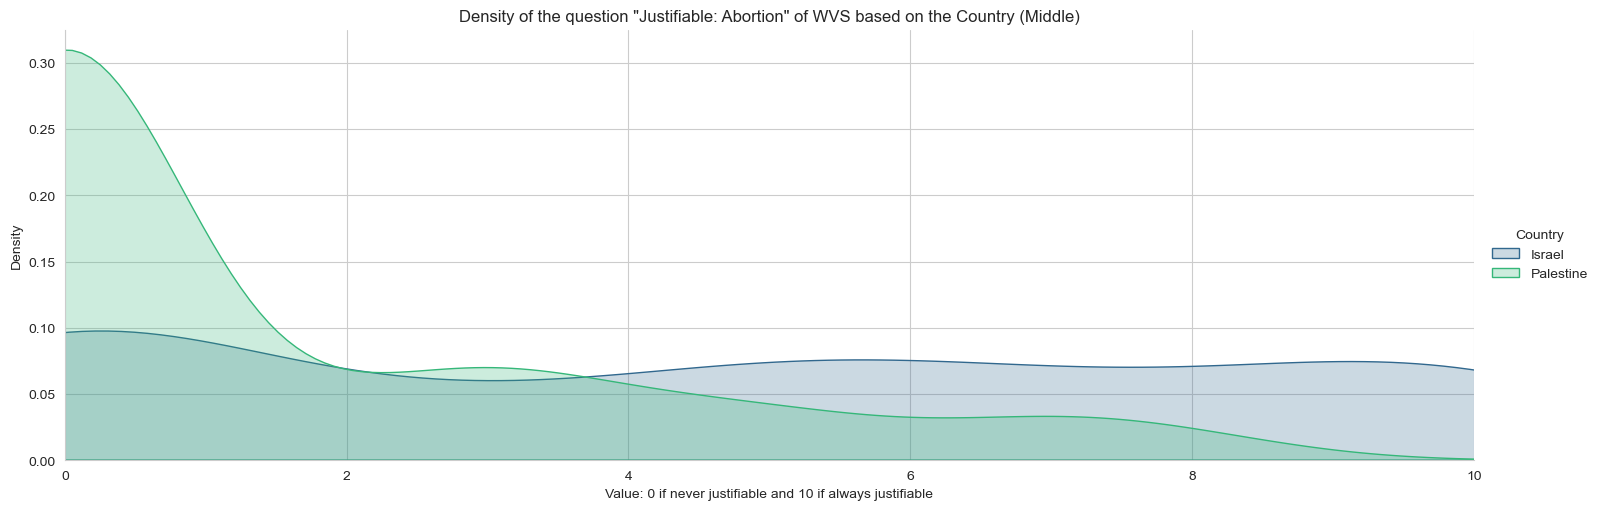

<Figure size 640x480 with 0 Axes>

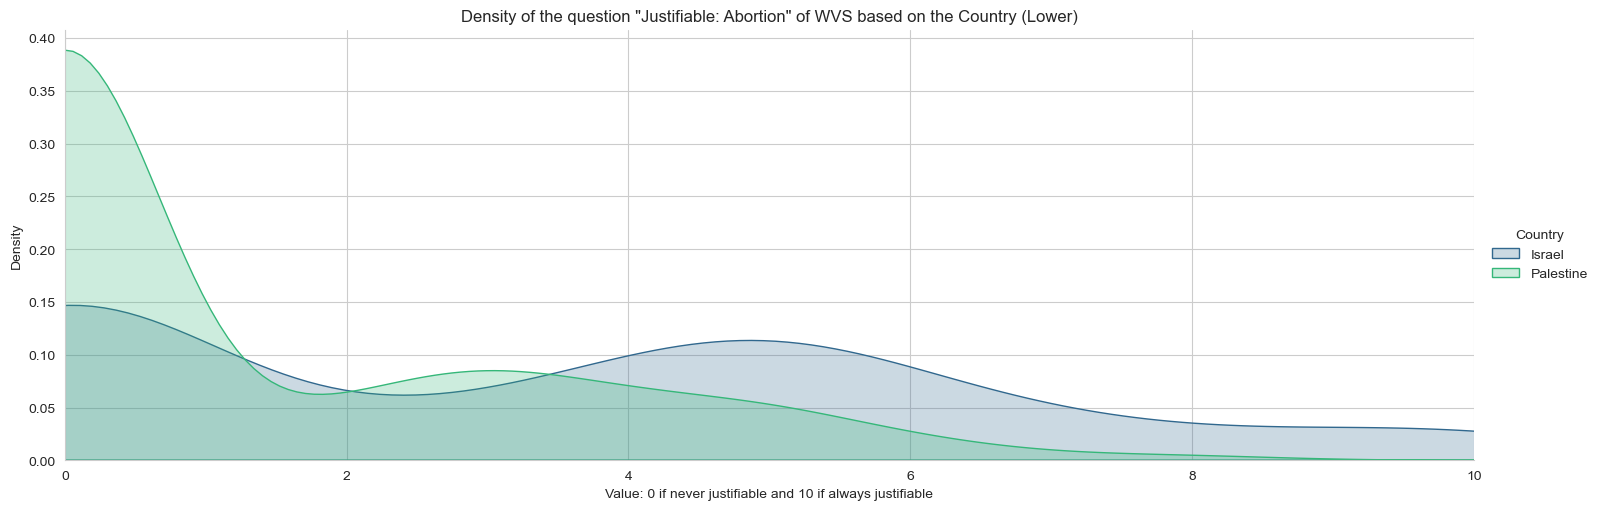

<Figure size 640x480 with 0 Axes>

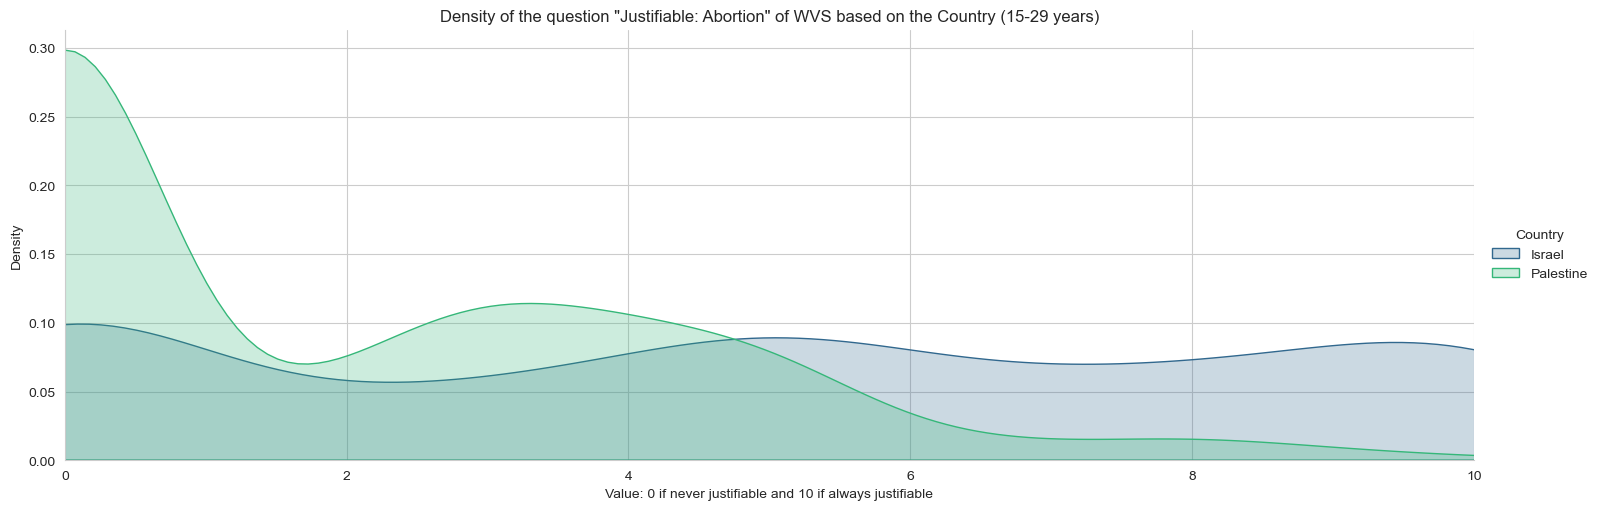

<Figure size 640x480 with 0 Axes>

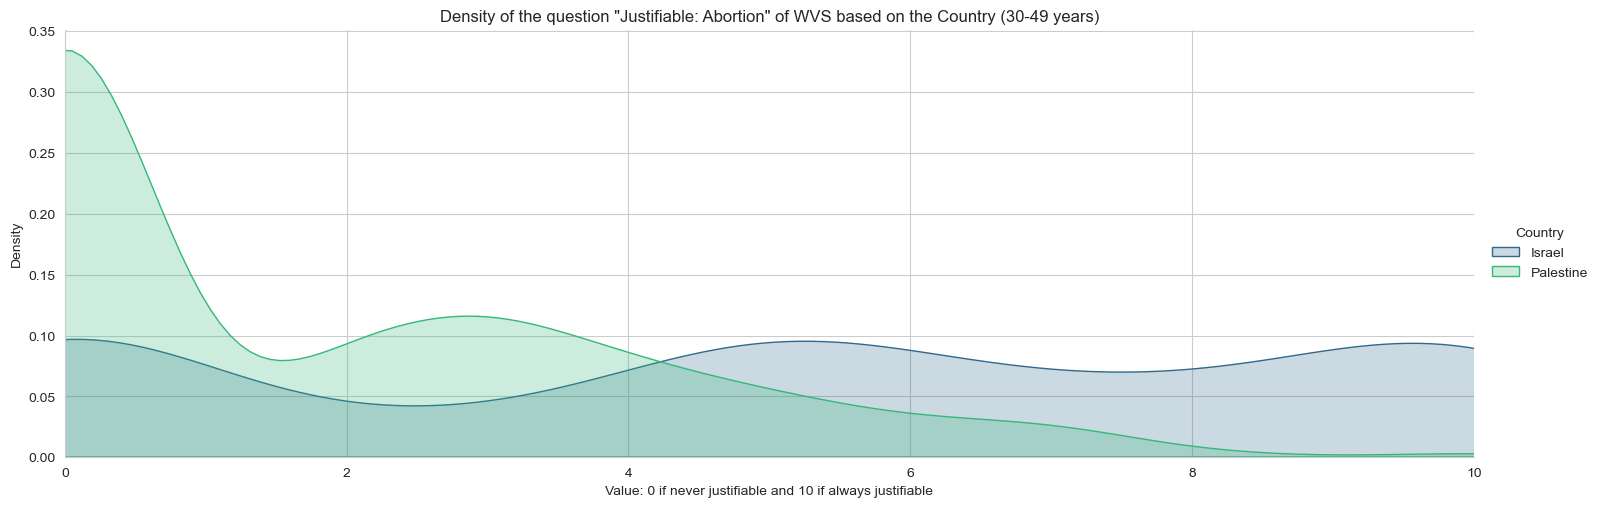

<Figure size 640x480 with 0 Axes>

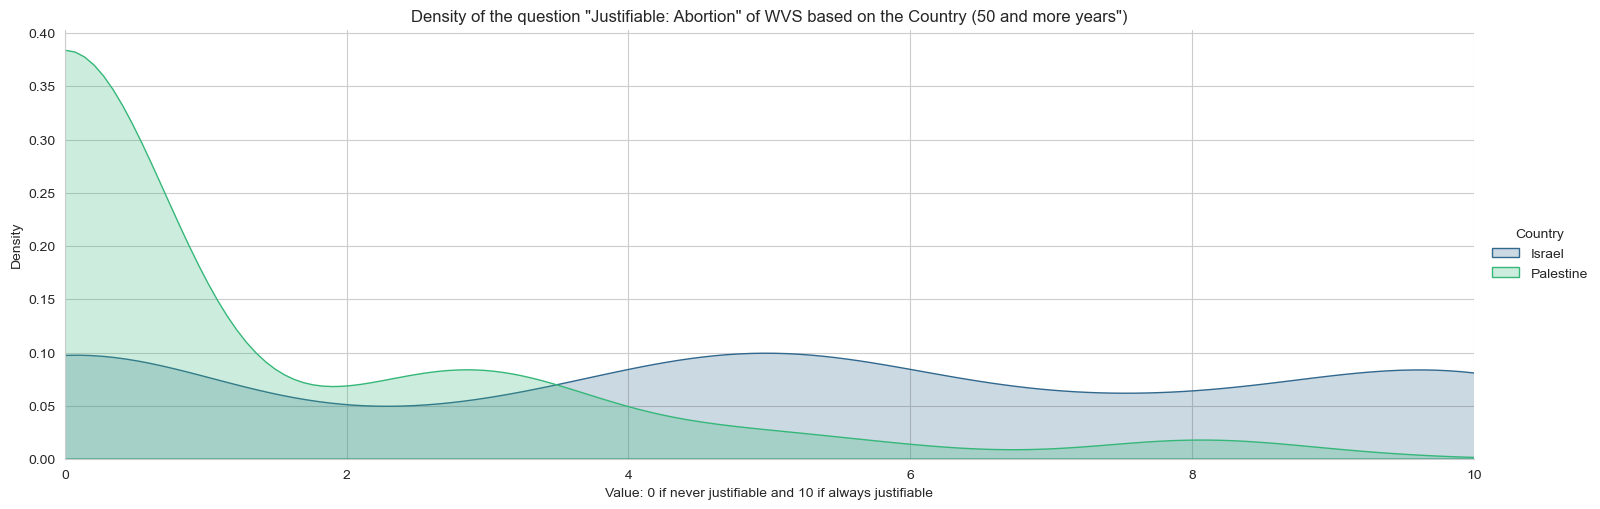

<Figure size 640x480 with 0 Axes>

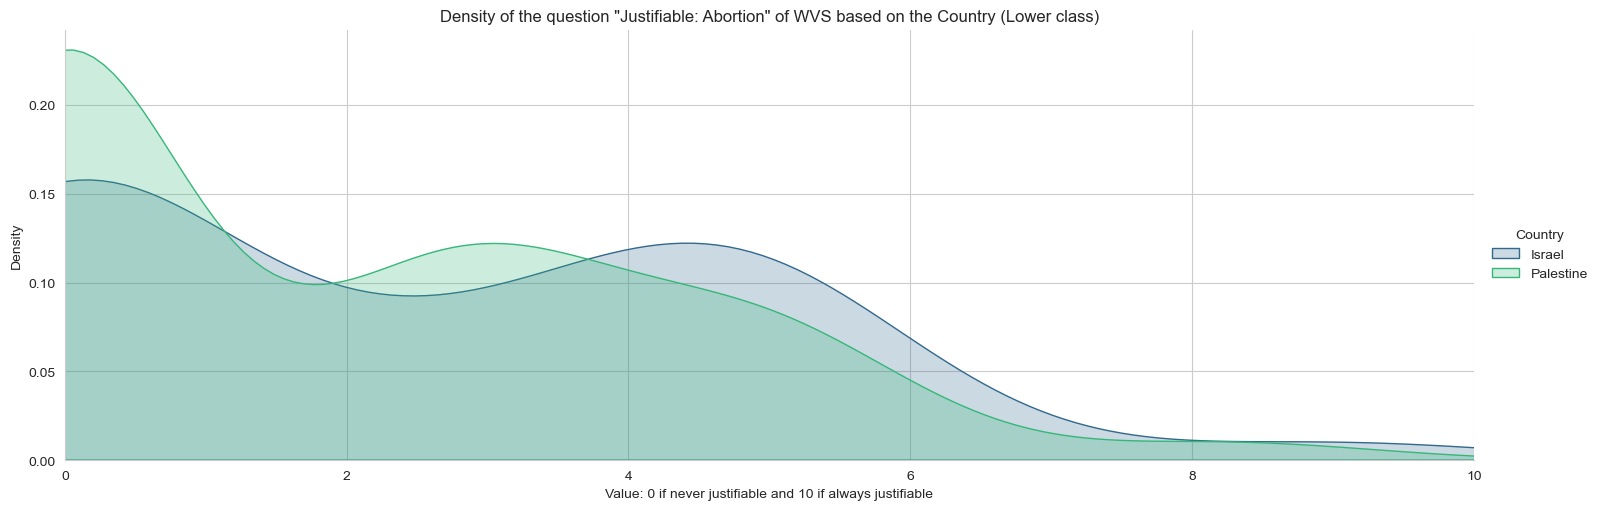

<Figure size 640x480 with 0 Axes>

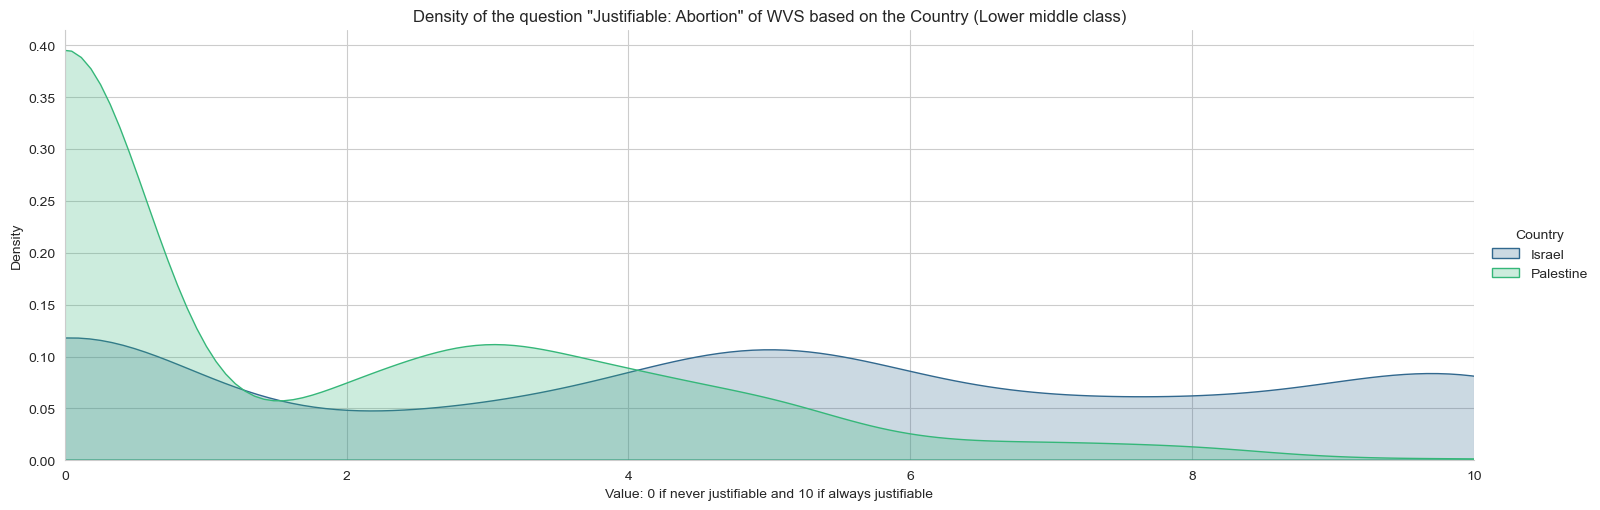

<Figure size 640x480 with 0 Axes>

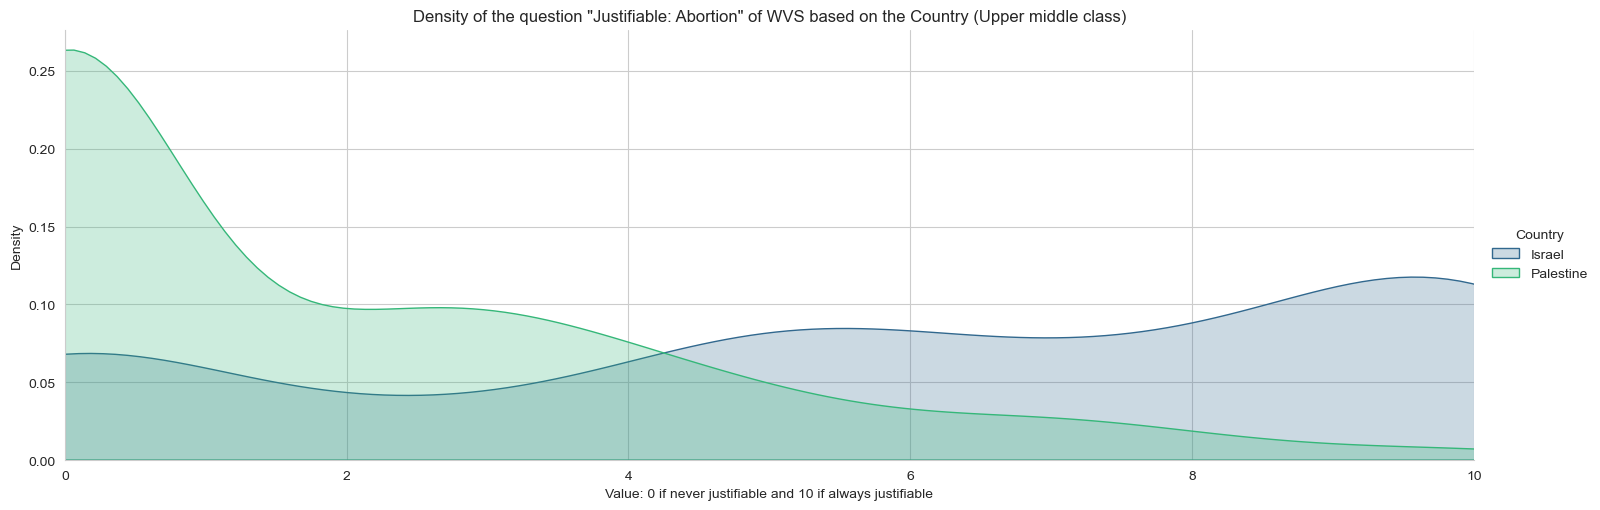

<Figure size 640x480 with 0 Axes>

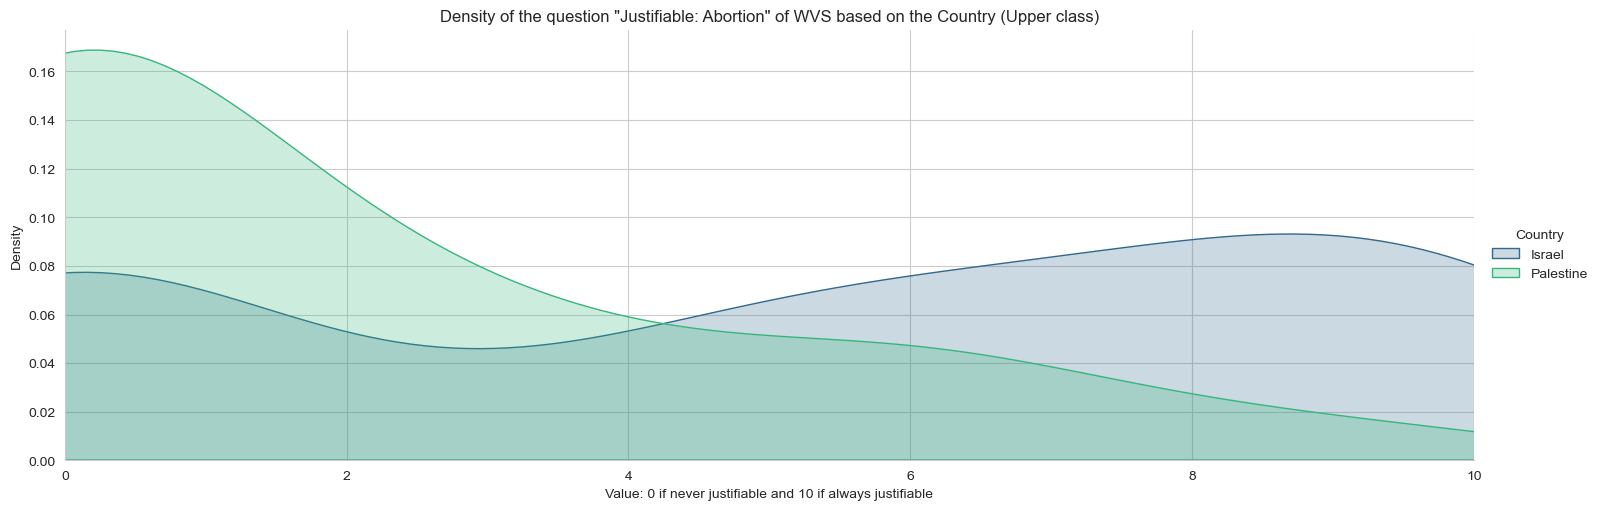

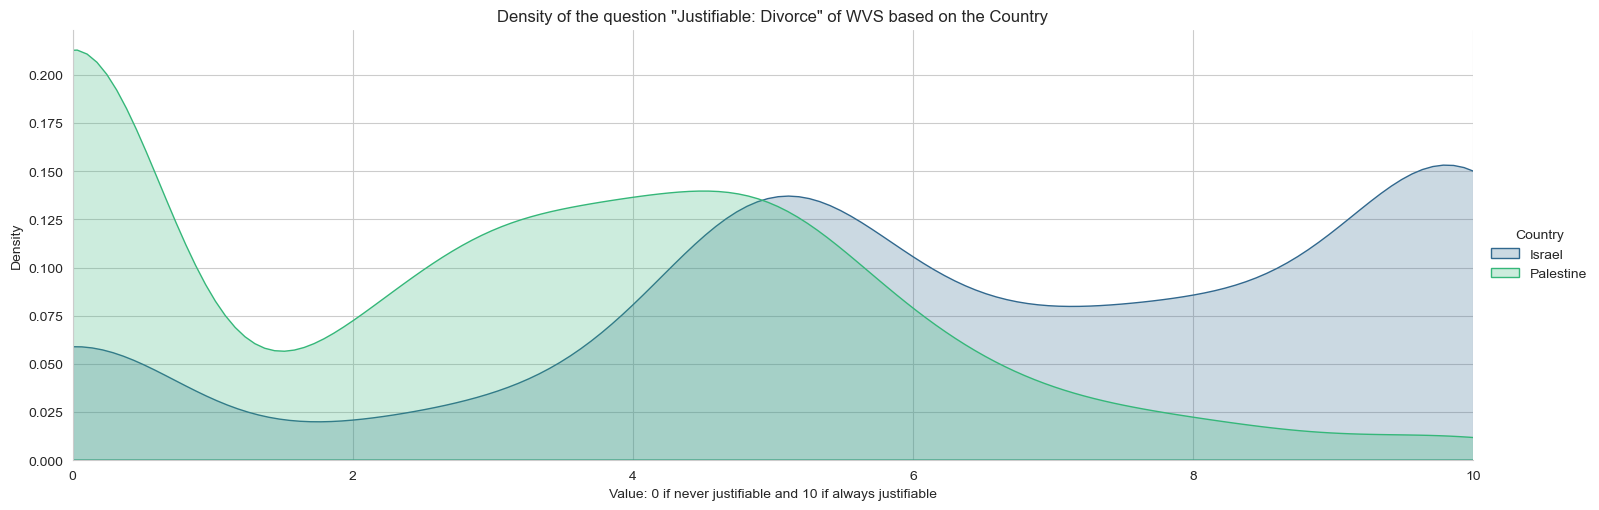

<Figure size 640x480 with 0 Axes>

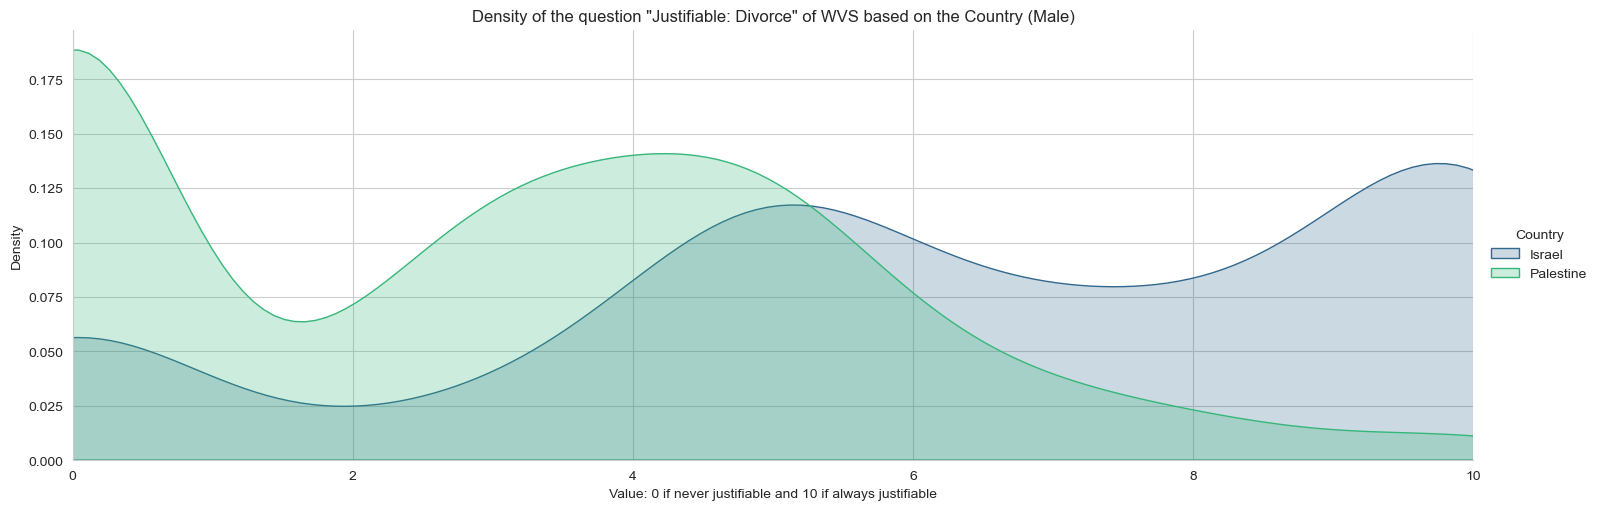

<Figure size 640x480 with 0 Axes>

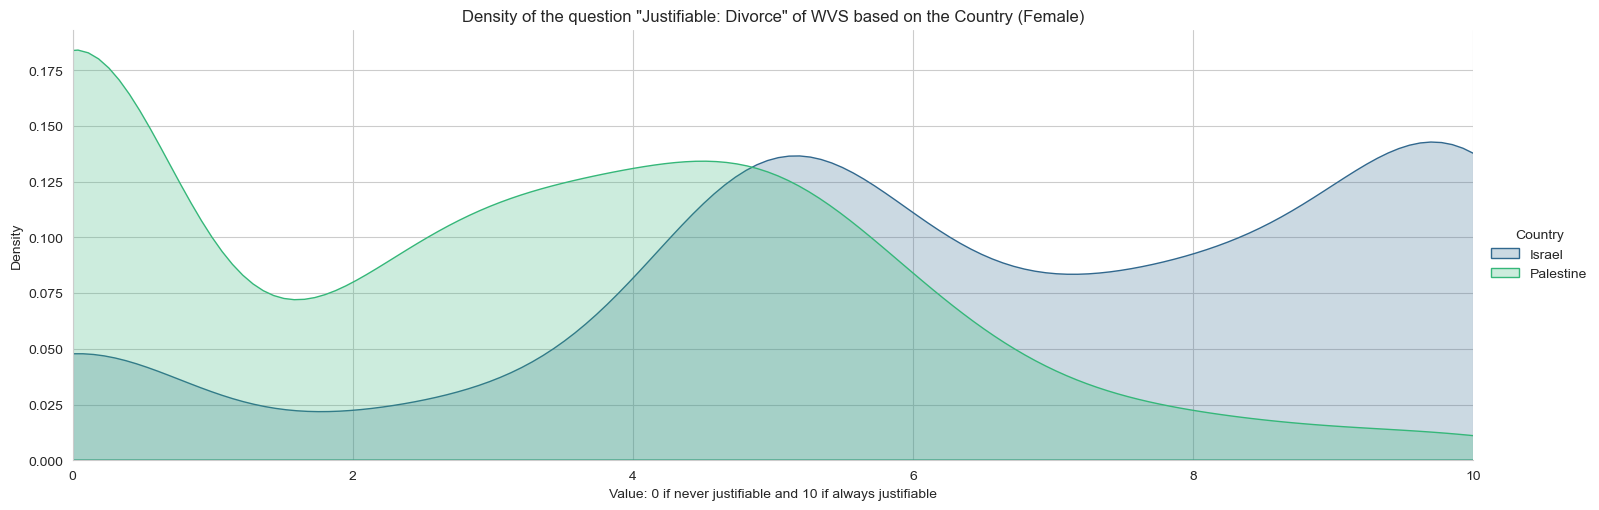

<Figure size 640x480 with 0 Axes>

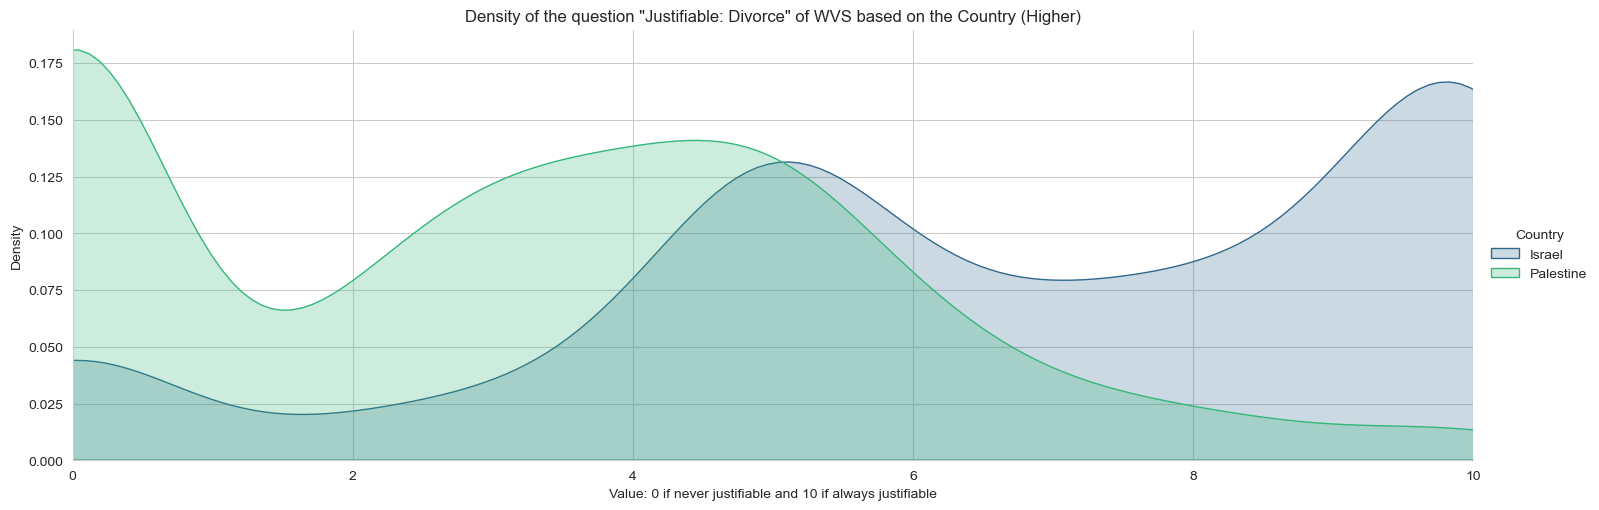

<Figure size 640x480 with 0 Axes>

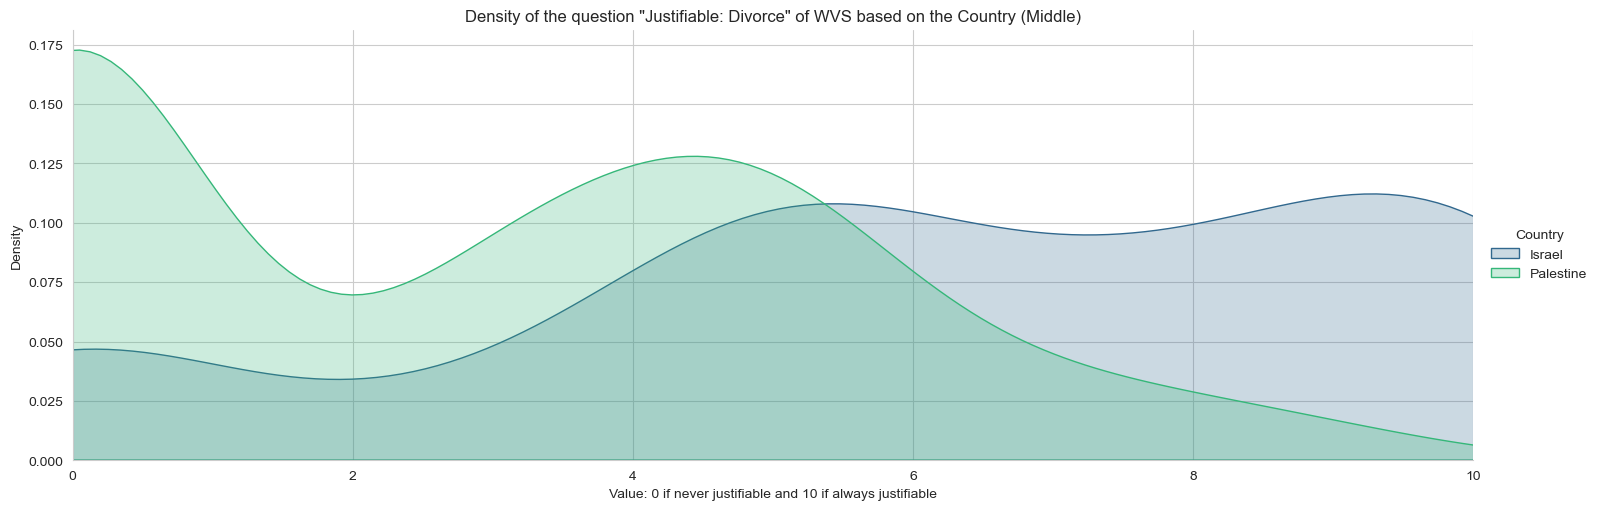

<Figure size 640x480 with 0 Axes>

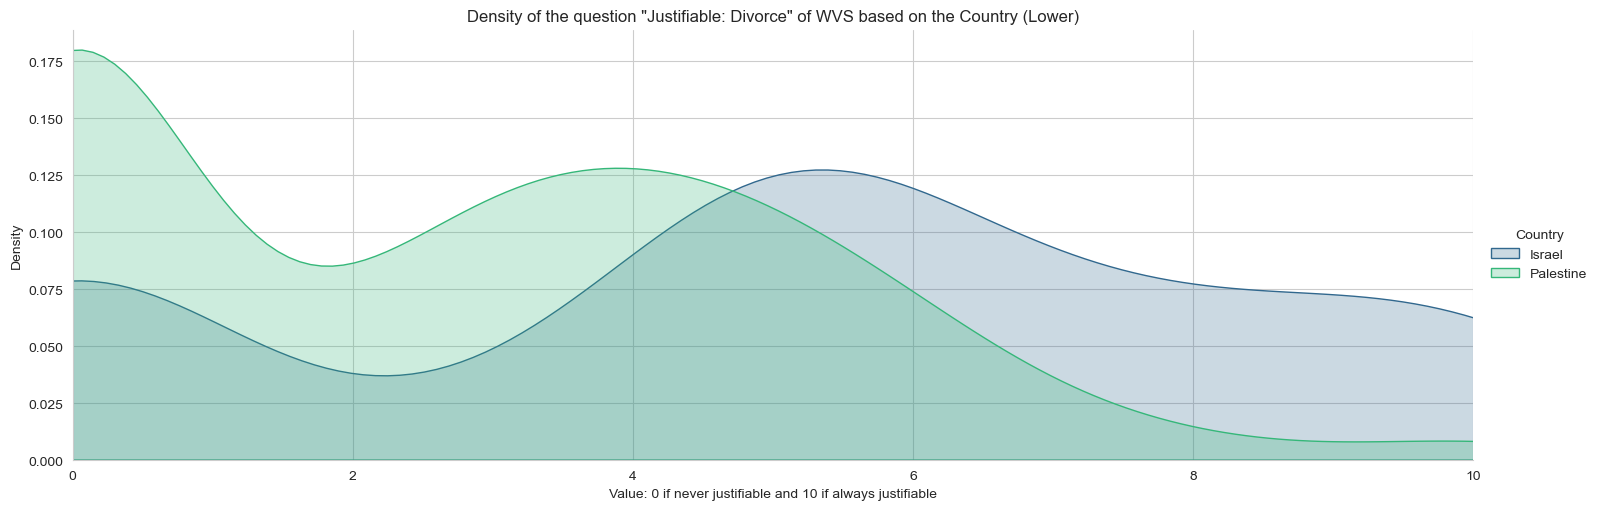

<Figure size 640x480 with 0 Axes>

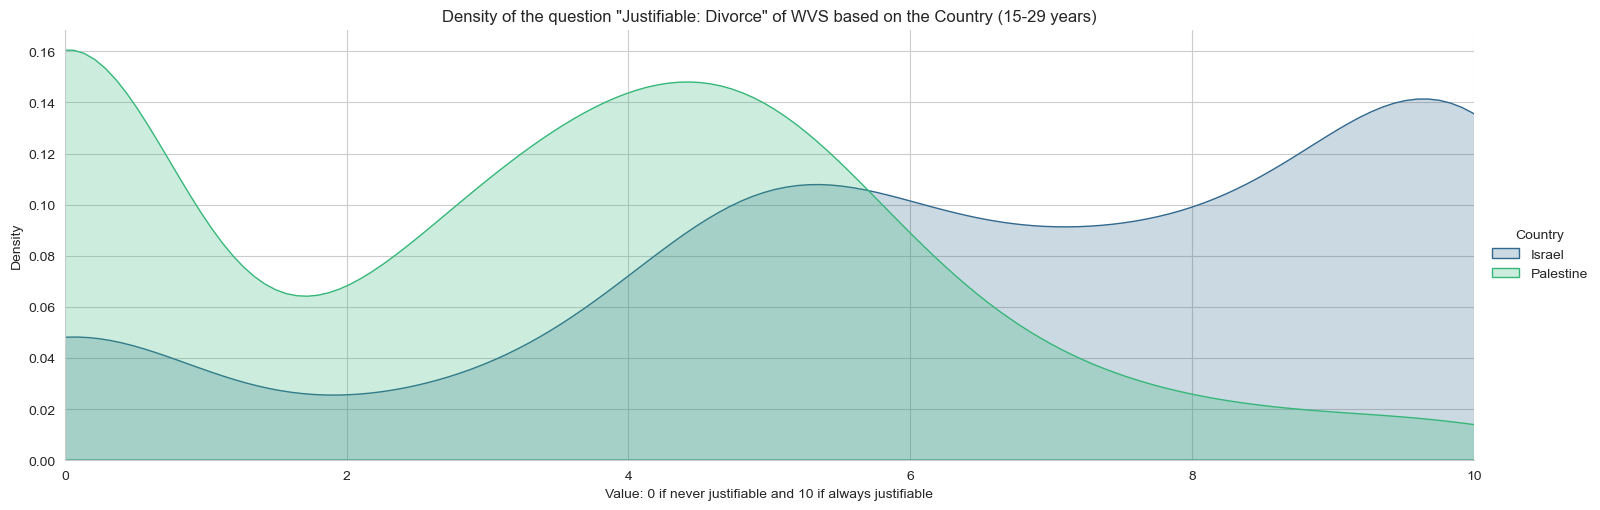

<Figure size 640x480 with 0 Axes>

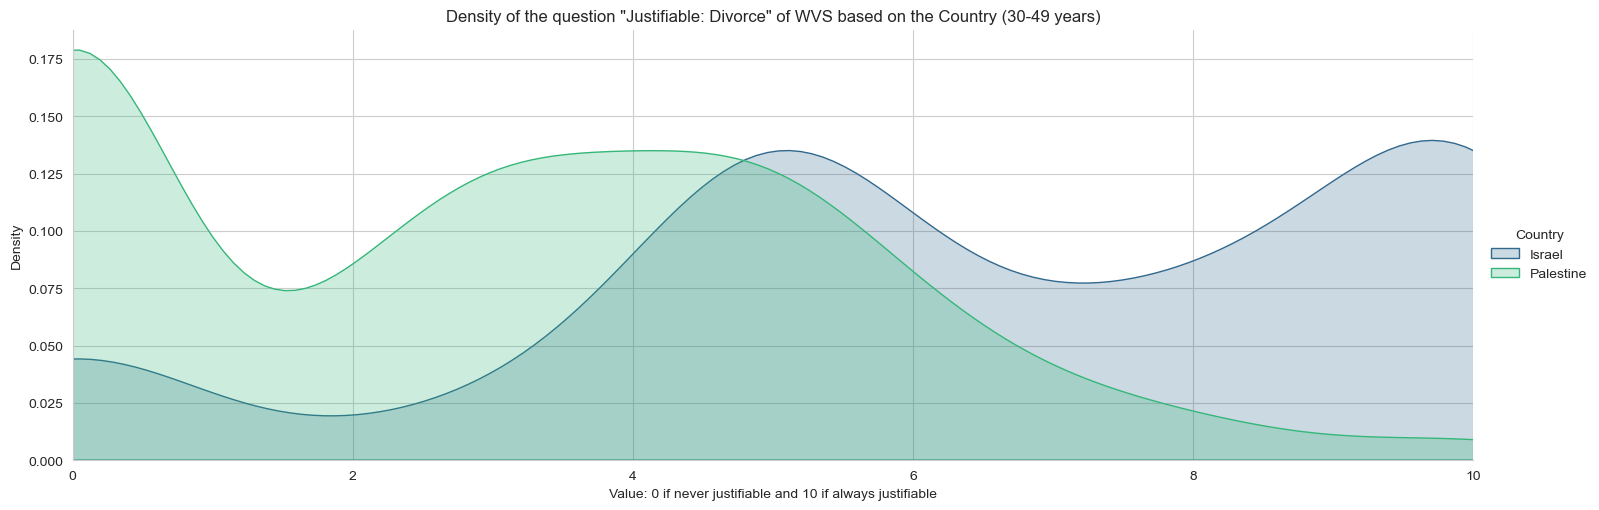

<Figure size 640x480 with 0 Axes>

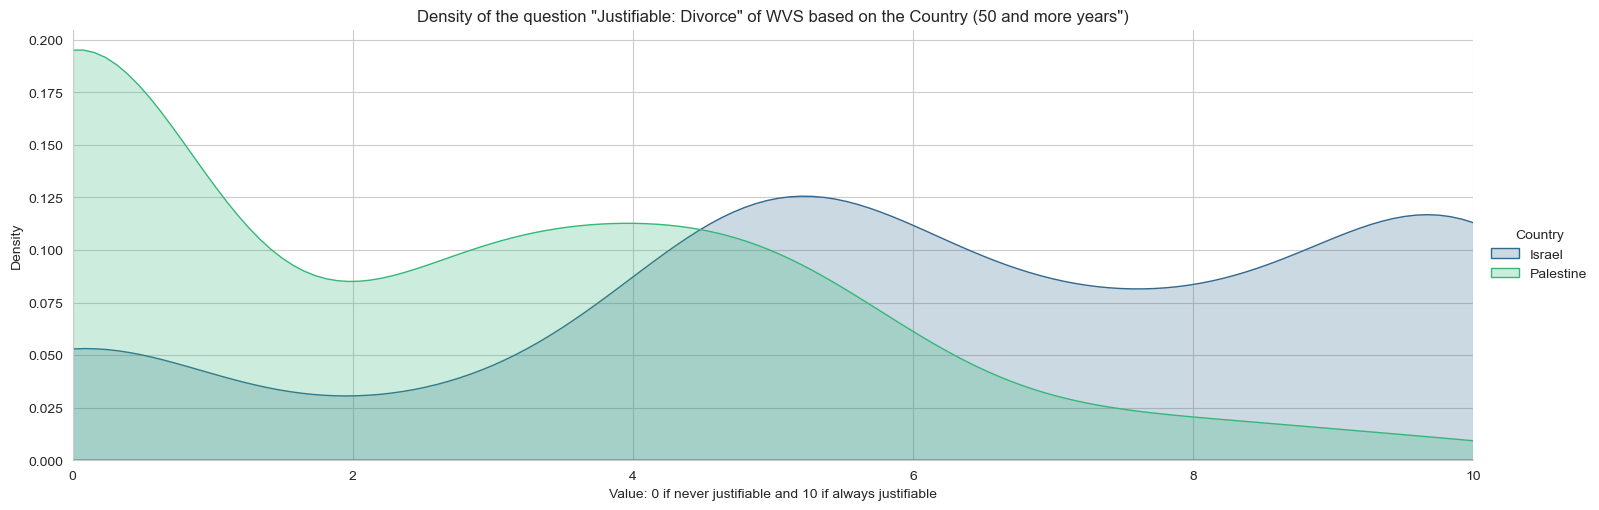

<Figure size 640x480 with 0 Axes>

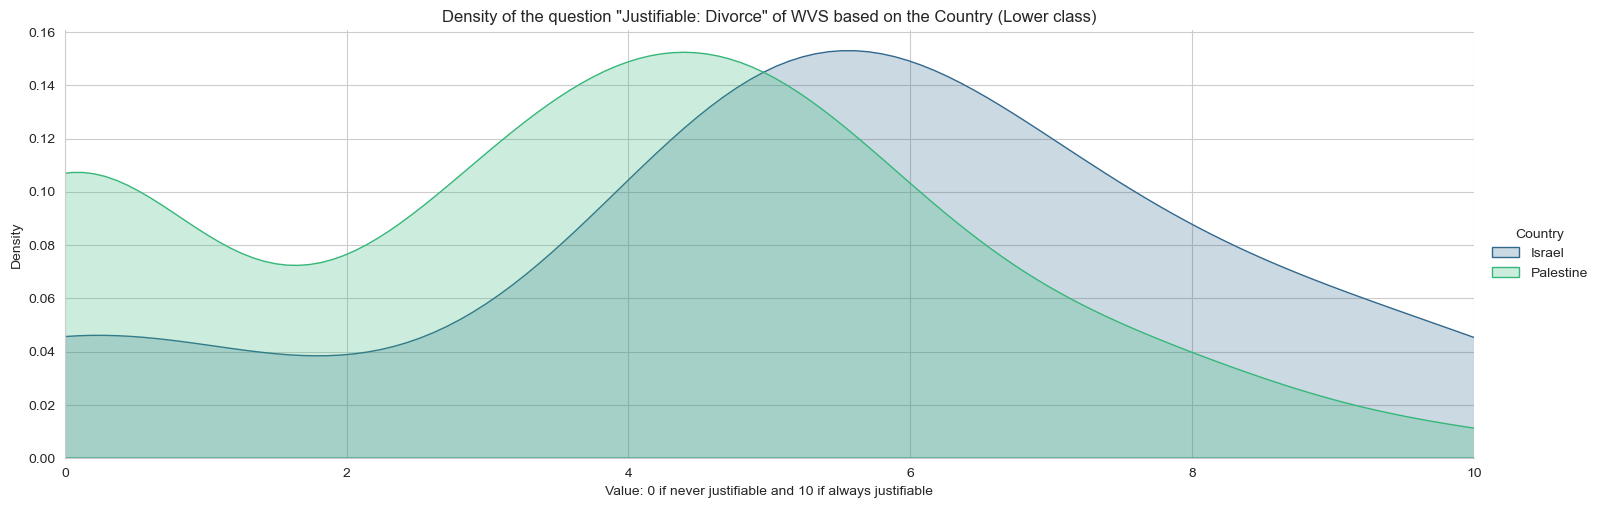

<Figure size 640x480 with 0 Axes>

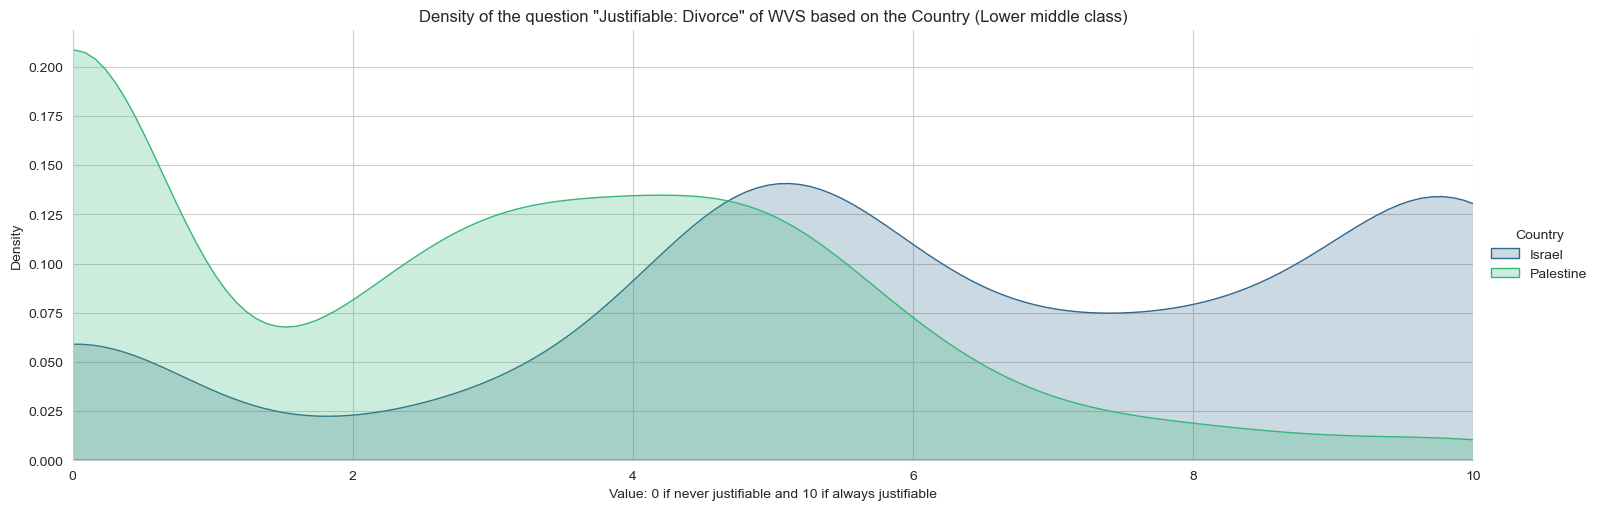

<Figure size 640x480 with 0 Axes>

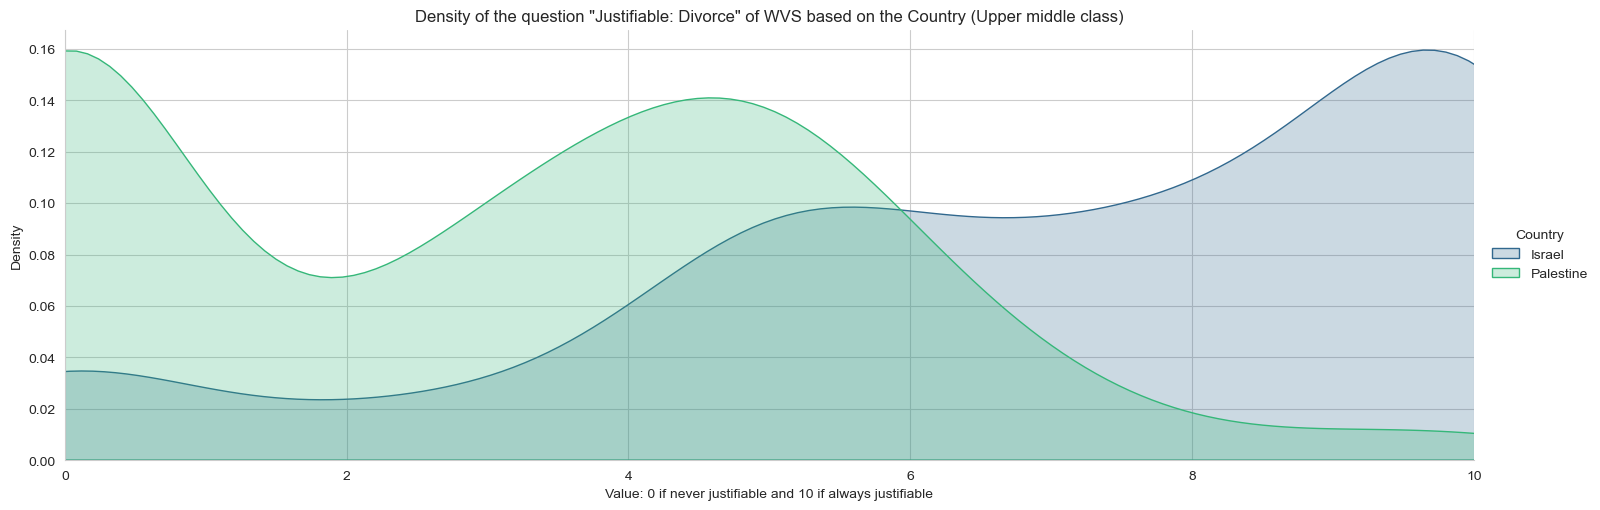

<Figure size 640x480 with 0 Axes>

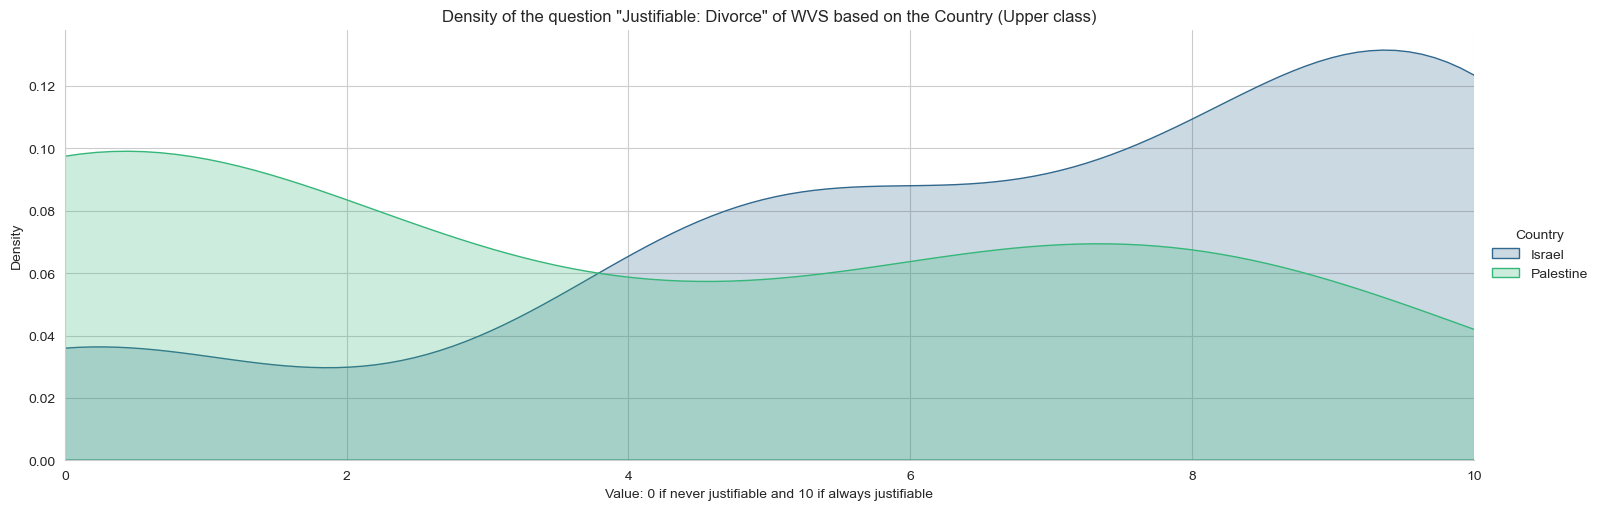

In [30]:
sns.set_style('whitegrid')

for col in ['Justifiable: Homosexuality', 'Justifiable: Abortion', 'Justifiable: Divorce']:
    df[col] = df[col].apply(lambda x: '0' if x == 'Never justifiable' else x)
    df[col] = df[col].apply(lambda x: '10' if x == 'Always justifiable' else x)
    df[col] = df[col].astype(int)
    
    g = sns.FacetGrid(df, hue='Country', aspect=3, height=5, palette='viridis')
            
    g.map(sns.kdeplot, col, fill=True)
            
    g.add_legend(title='Country')
            
    # Enhance the plot with titles and labels
    plt.title(f'Density of the question "{col}" of WVS based on the Country')
    plt.xlabel('Value: 0 if never justifiable and 10 if always justifiable')
    plt.ylabel('Density')
        
    plt.xlim(0, 10)
        
    plt.savefig(f'C:/Users/{user}/Downloads/{col}.png')
    plt.show()
        
    for sex in ['Male', 'Female']:
        df_plot = df[df['Sex'] == sex]
        
        plt.figure()
        g = sns.FacetGrid(df_plot, hue='Country', aspect=3, height=5, palette='viridis')
            
        g.map(sns.kdeplot, col, fill=True)
            
        g.add_legend(title='Country')
            
        # Enhance the plot with titles and labels
        plt.title(f'Density of the question "{col}" of WVS based on the Country ({sex})')
        plt.xlabel('Value: 0 if never justifiable and 10 if always justifiable')
        plt.ylabel('Density')
        
        plt.xlim(0, 10)
        
        plt.savefig(f'C:/Users/{user}/Downloads/{col}_{sex}.png')
        plt.show()
        
    for edu in ['Higher', 'Middle', 'Lower']:
        df_plot = df[df['Highest educational level attained'] == edu]
        
        plt.figure()
        g = sns.FacetGrid(df_plot, hue='Country', aspect=3, height=5, palette='viridis')
            
        g.map(sns.kdeplot, col, fill=True)
            
        g.add_legend(title='Country')
            
        # Enhance the plot with titles and labels
        plt.title(f'Density of the question "{col}" of WVS based on the Country ({edu})')
        plt.xlabel('Value: 0 if never justifiable and 10 if always justifiable')
        plt.ylabel('Density')
        
        plt.xlim(0, 10)
        
        plt.savefig(f'C:/Users/{user}/Downloads/{col}_{edu}.png')
        plt.show()


    for age in ['15-29 years', '30-49 years', '50 and more years"']:
        df_plot = df[df['Age group'] == age]
        
        plt.figure()
        
        g = sns.FacetGrid(df_plot, hue='Country', aspect=3, height=5, palette='viridis')
            
        g.map(sns.kdeplot, col, fill=True)
            
        g.add_legend(title='Country')
            
        # Enhance the plot with titles and labels
        plt.title(f'Density of the question "{col}" of WVS based on the Country ({age})')
        plt.xlabel('Value: 0 if never justifiable and 10 if always justifiable')
        plt.ylabel('Density')
        
        plt.xlim(0, 10)
        
        plt.savefig(f'C:/Users/{user}/Downloads/{col}_{age}.png')
        plt.show()

        
    for clase in ['Lower class', 'Lower middle class', 'Upper middle class', 'Upper class']:
        df_plot = df[df['Social class (subjective)'] == clase]
        
        plt.figure()
        g = sns.FacetGrid(df_plot, hue='Country', aspect=3, height=5, palette='viridis')
            
        g.map(sns.kdeplot, col, fill=True)
            
        g.add_legend(title='Country')
            
        # Enhance the plot with titles and labels
        plt.title(f'Density of the question "{col}" of WVS based on the Country ({clase})')
        plt.xlabel('Value: 0 if never justifiable and 10 if always justifiable')
        plt.ylabel('Density')
        
        plt.xlim(0, 10)
        
        plt.savefig(f'C:/Users/{user}/Downloads/{col}_{clase}.png')
        plt.show()

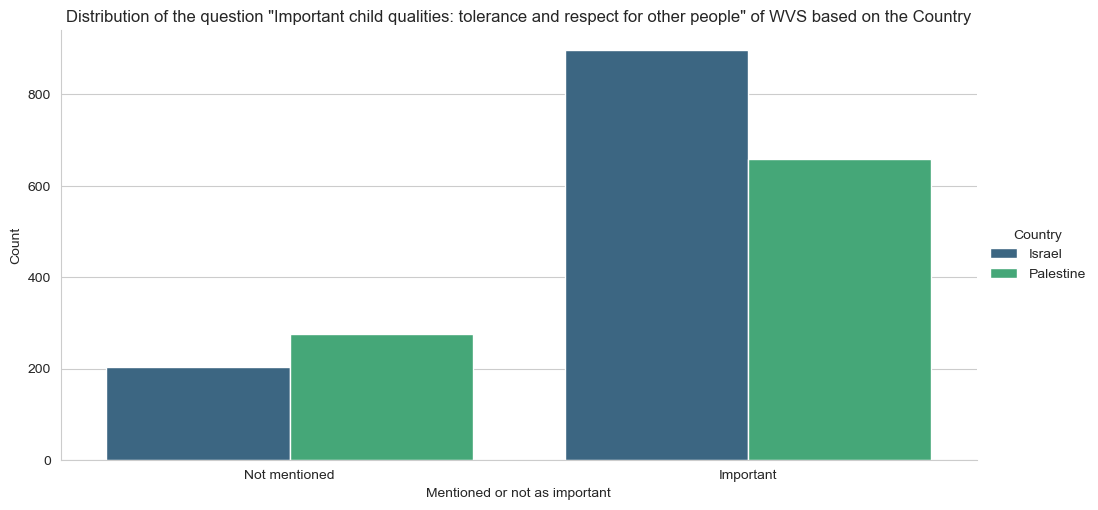

<Figure size 640x480 with 0 Axes>

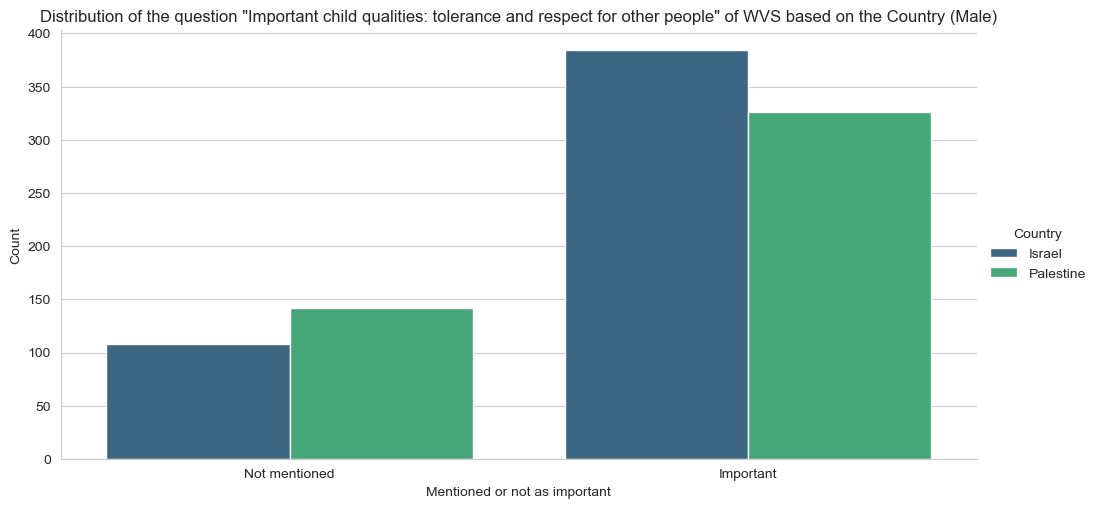

<Figure size 640x480 with 0 Axes>

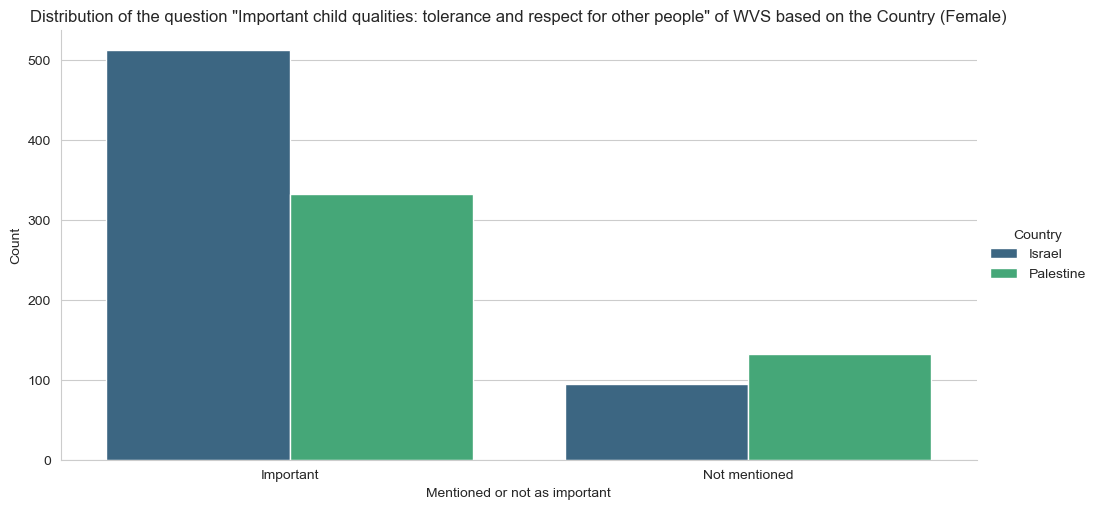

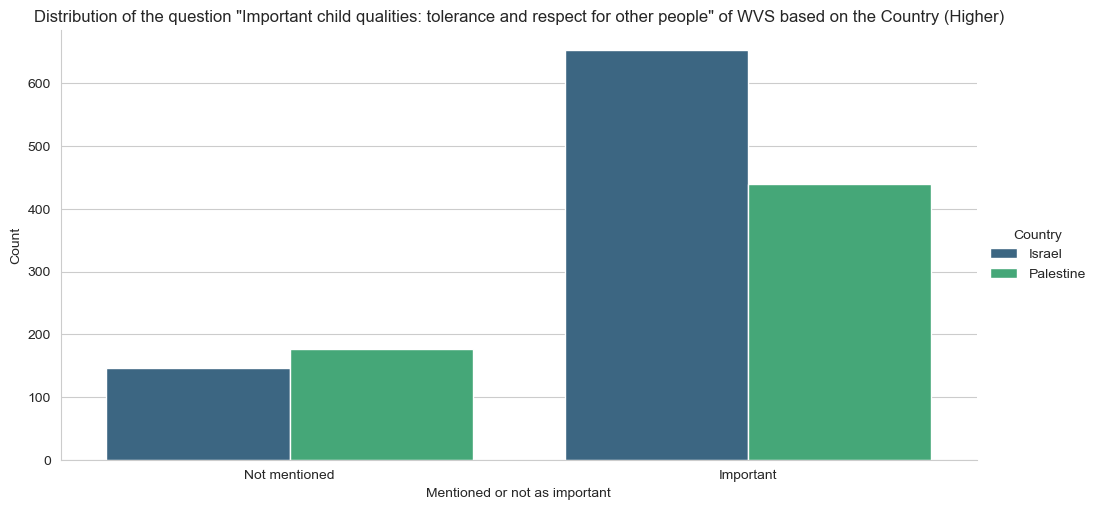

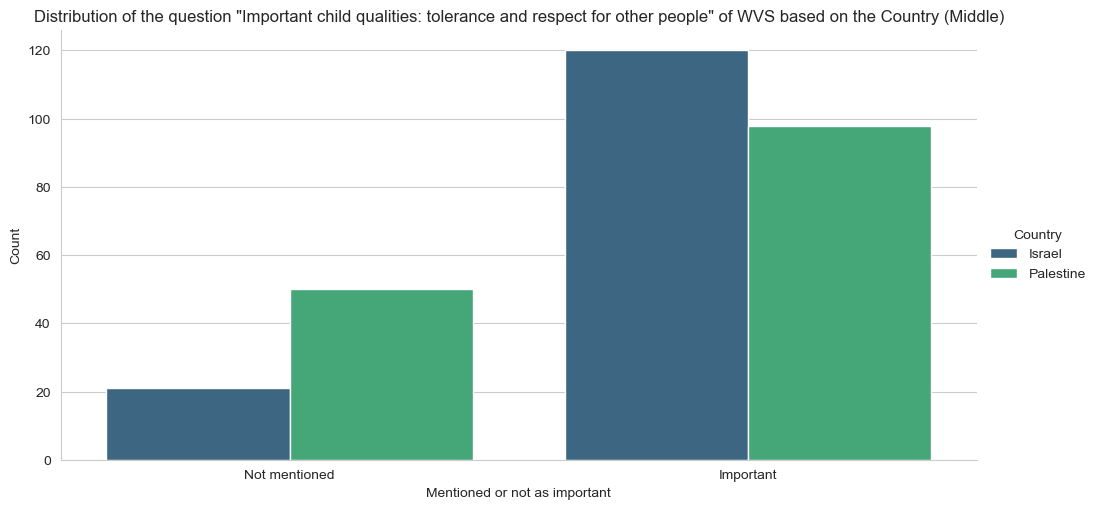

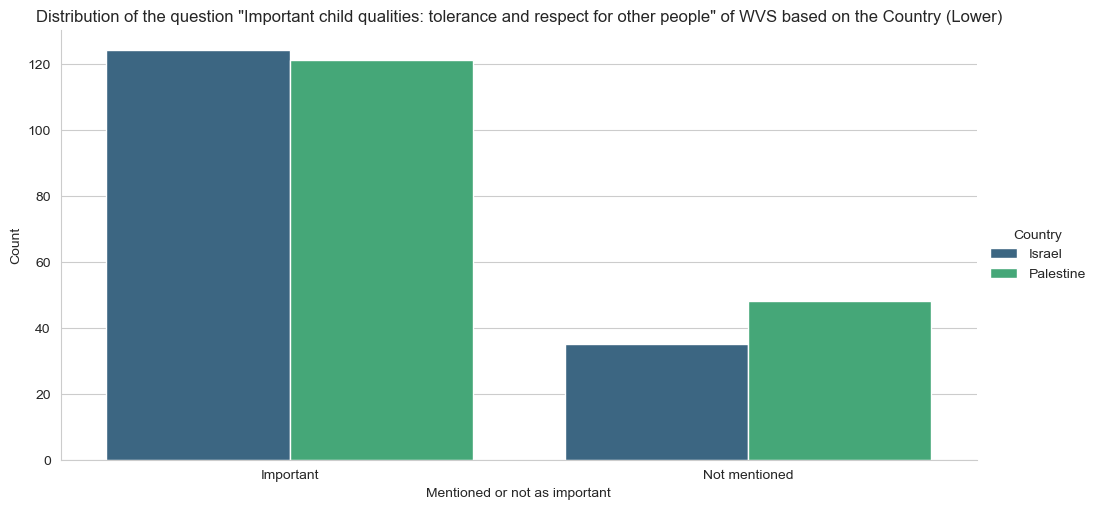

<Figure size 640x480 with 0 Axes>

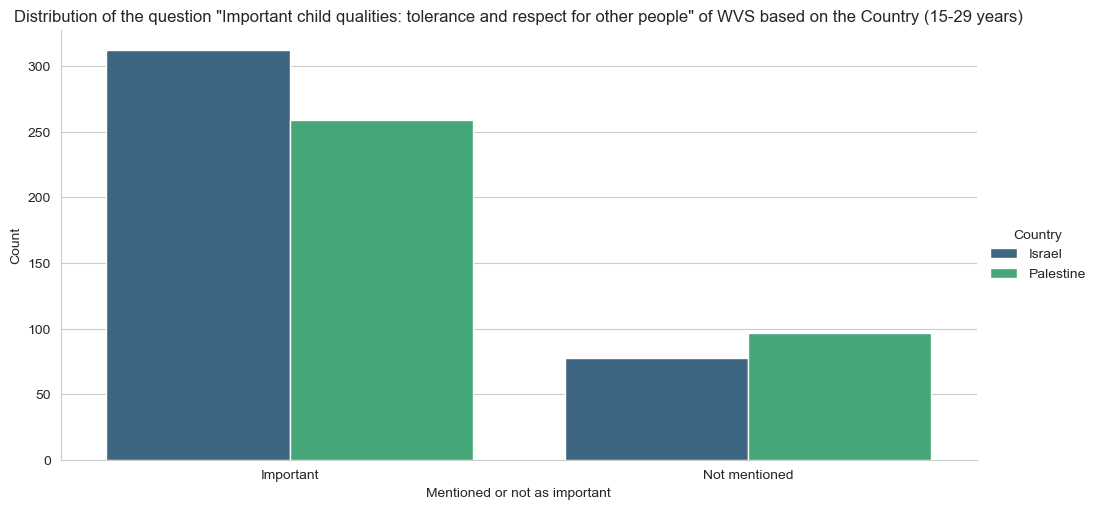

<Figure size 640x480 with 0 Axes>

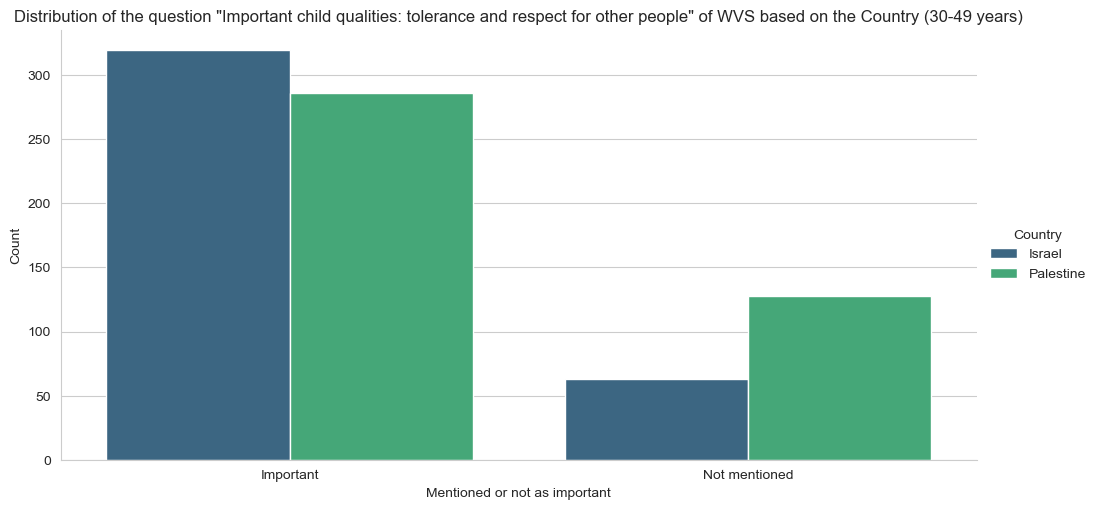

<Figure size 640x480 with 0 Axes>

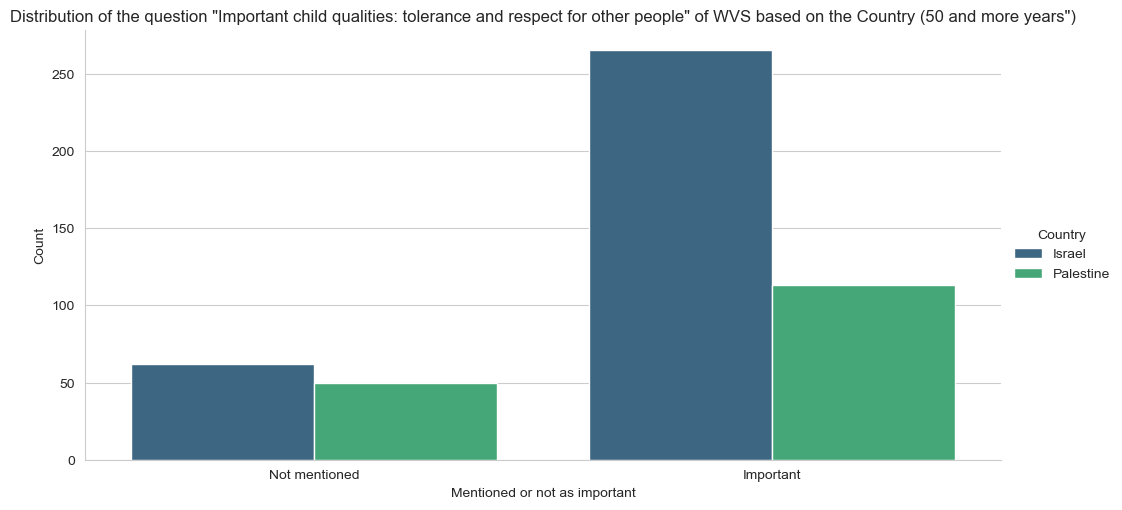

<Figure size 640x480 with 0 Axes>

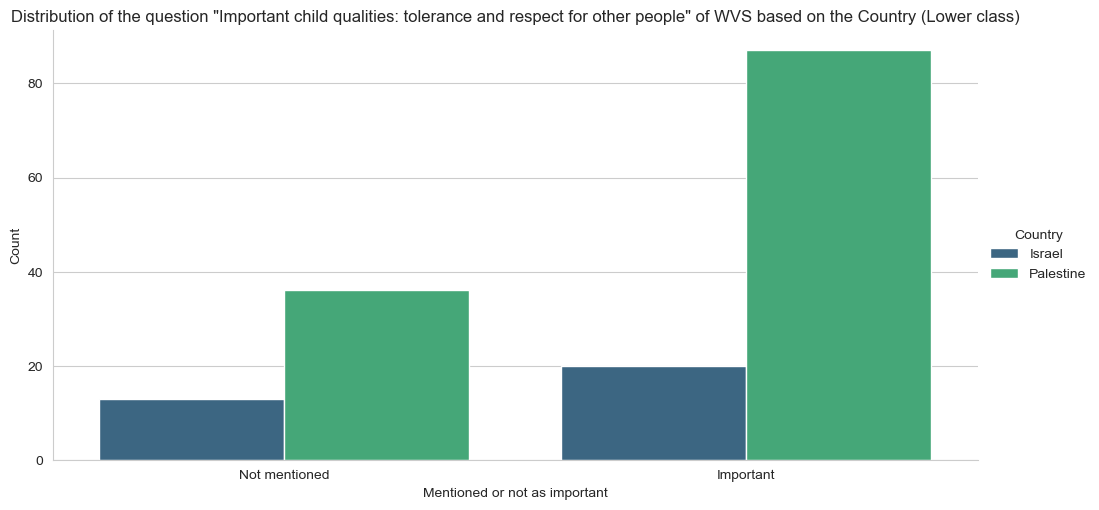

<Figure size 640x480 with 0 Axes>

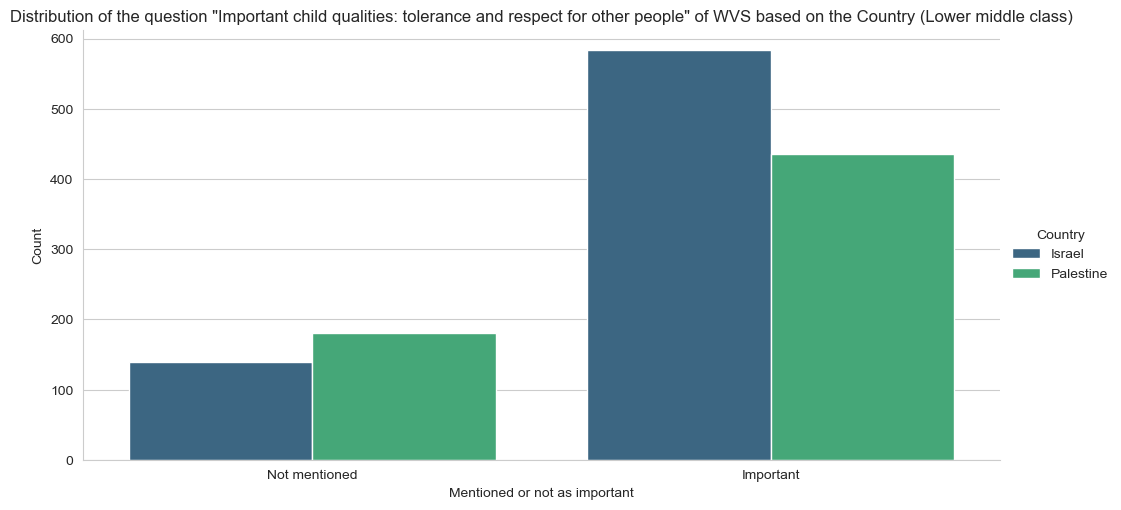

<Figure size 640x480 with 0 Axes>

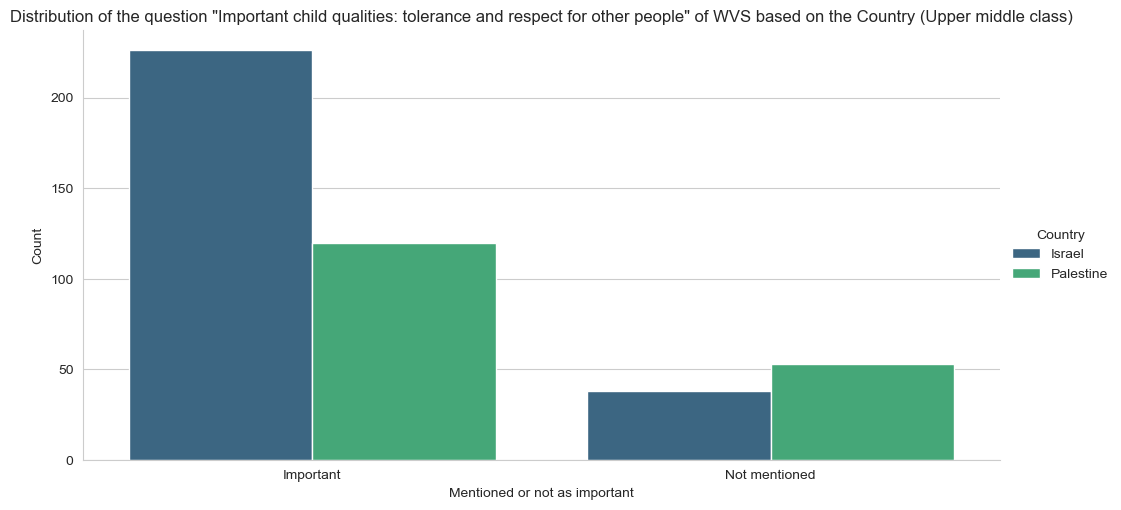

<Figure size 640x480 with 0 Axes>

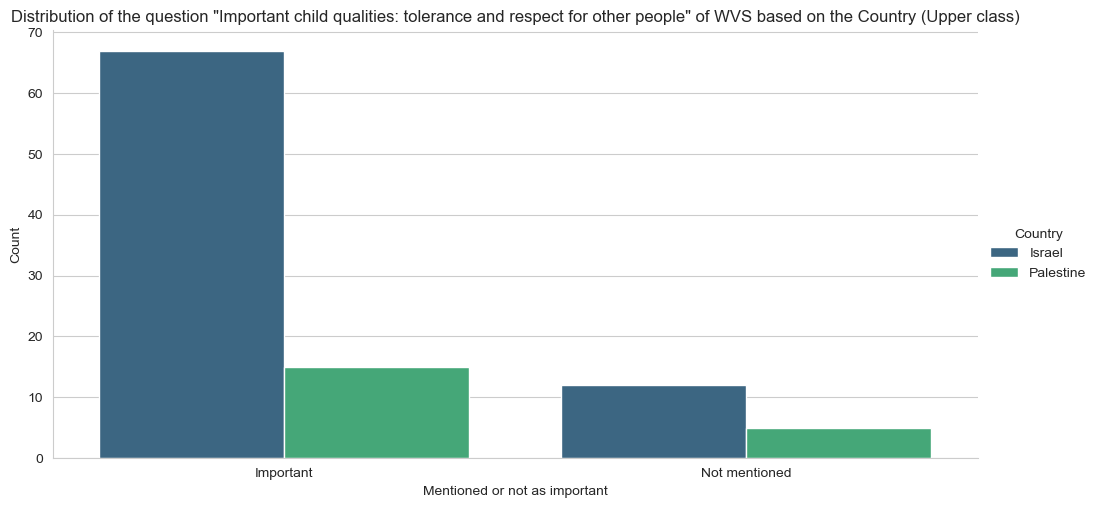

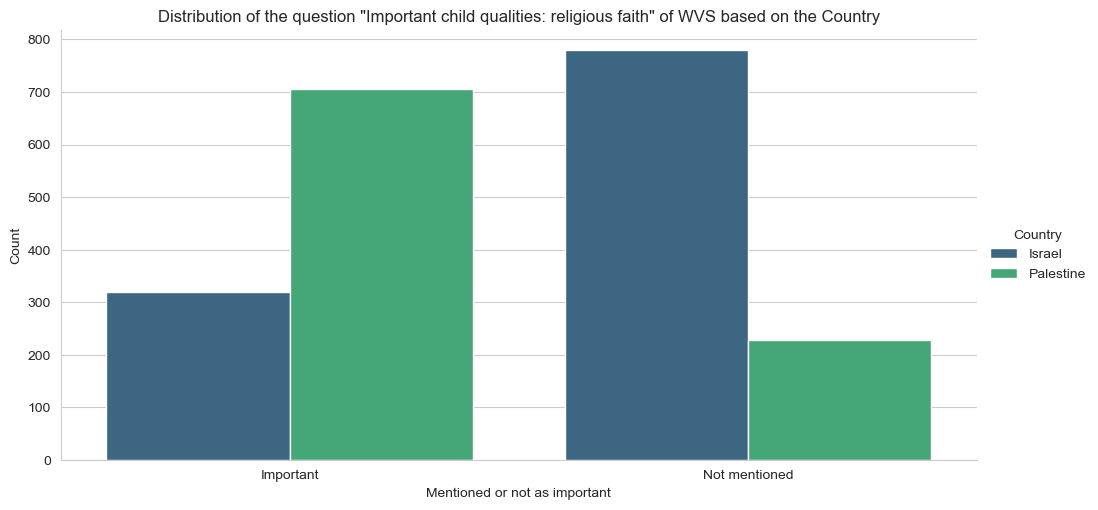

<Figure size 640x480 with 0 Axes>

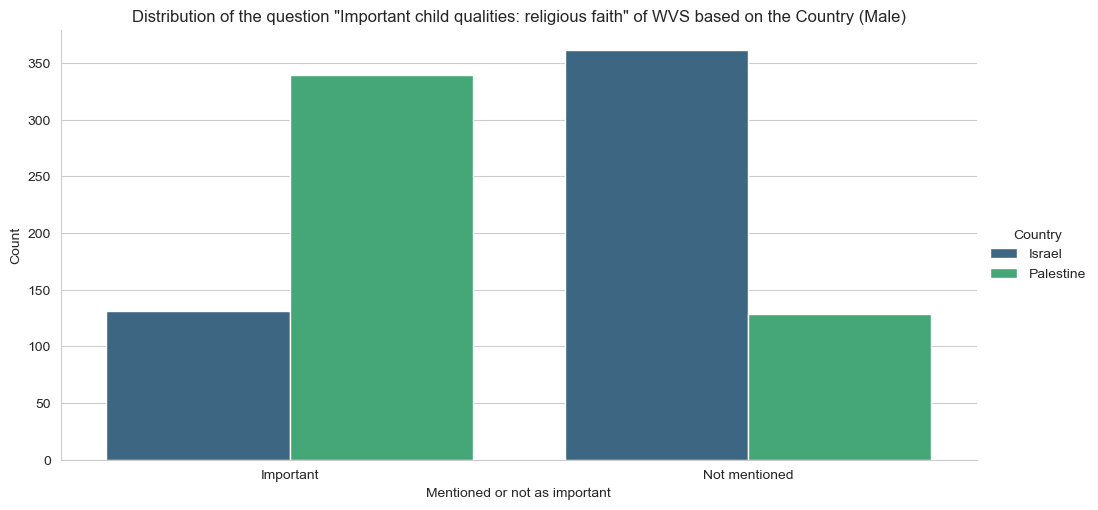

<Figure size 640x480 with 0 Axes>

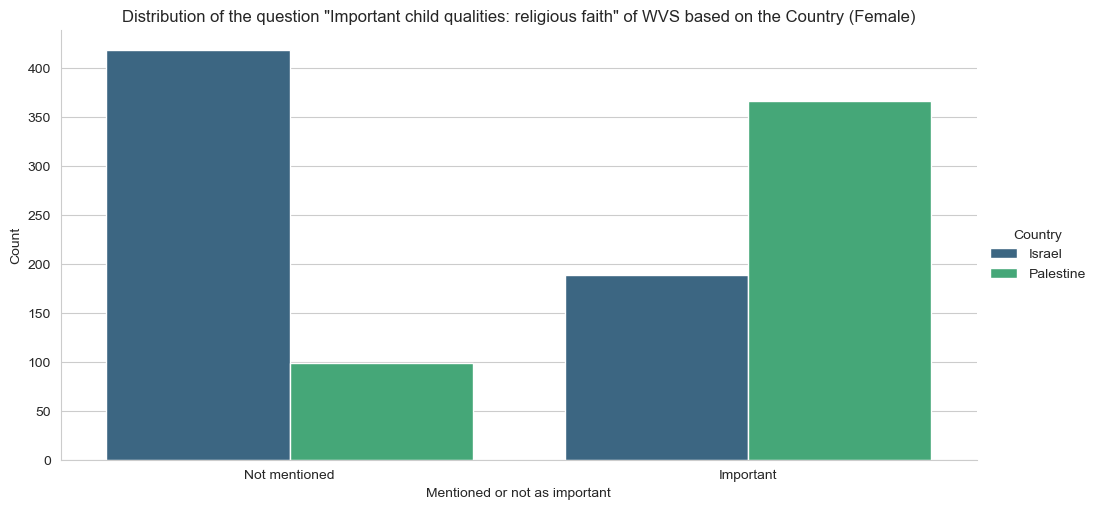

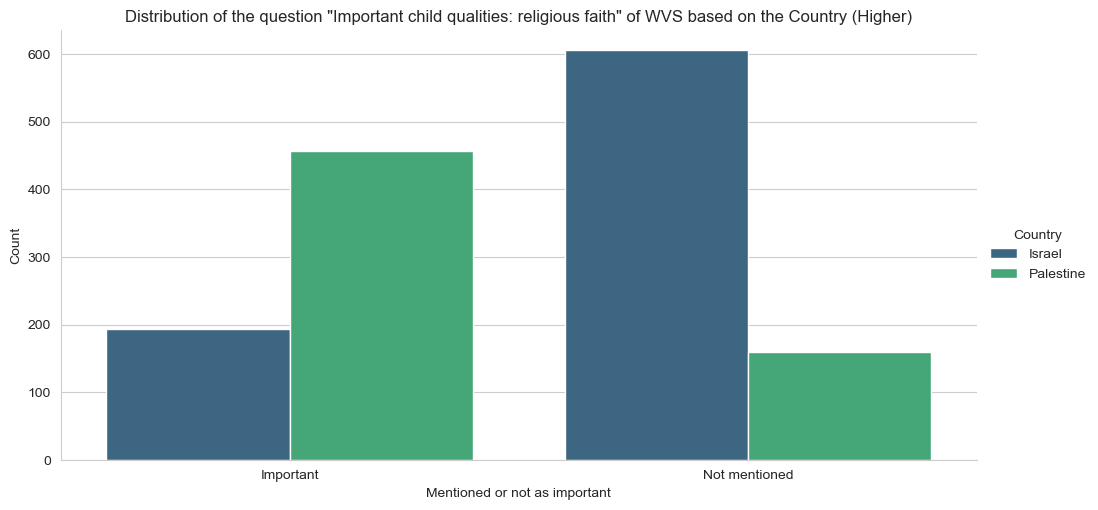

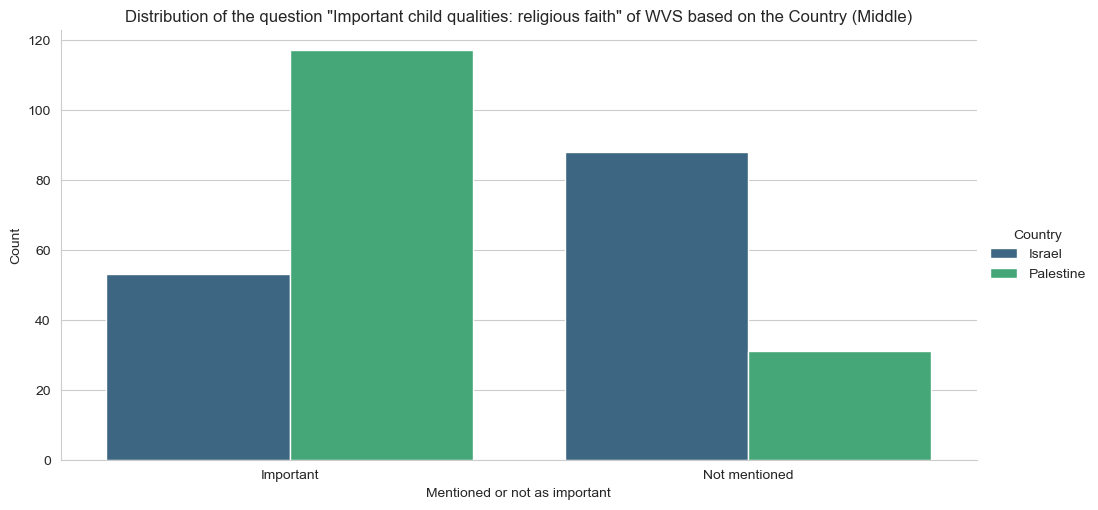

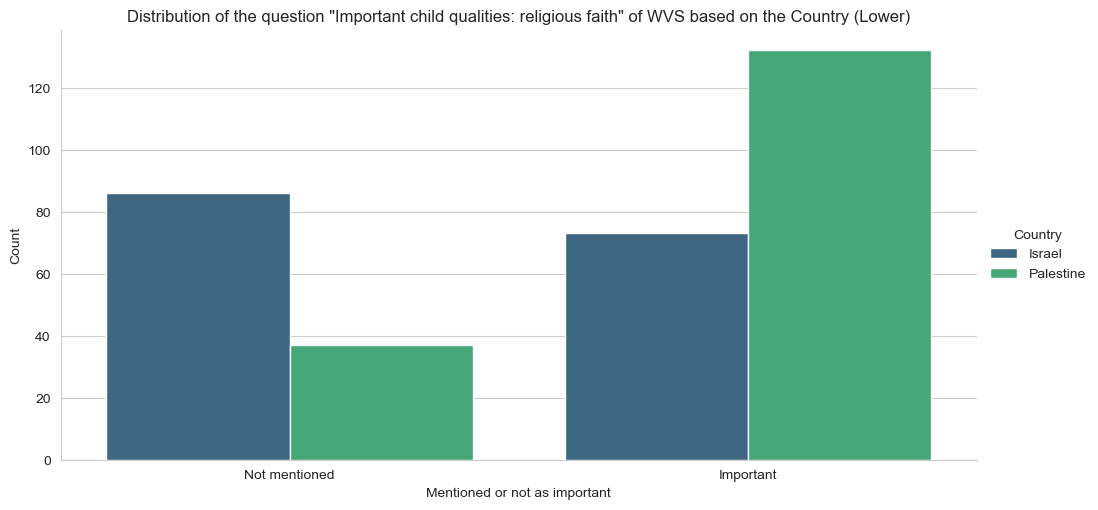

<Figure size 640x480 with 0 Axes>

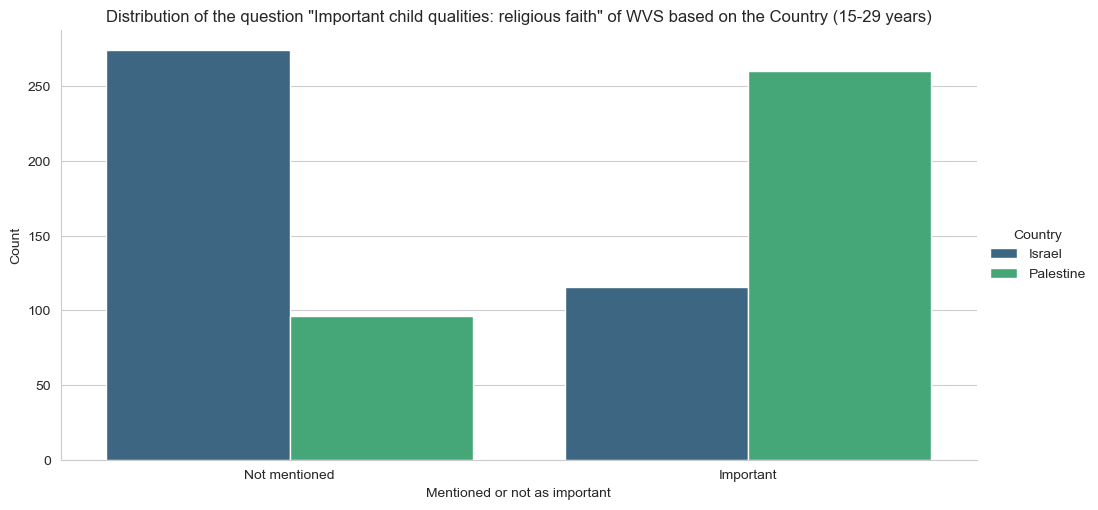

<Figure size 640x480 with 0 Axes>

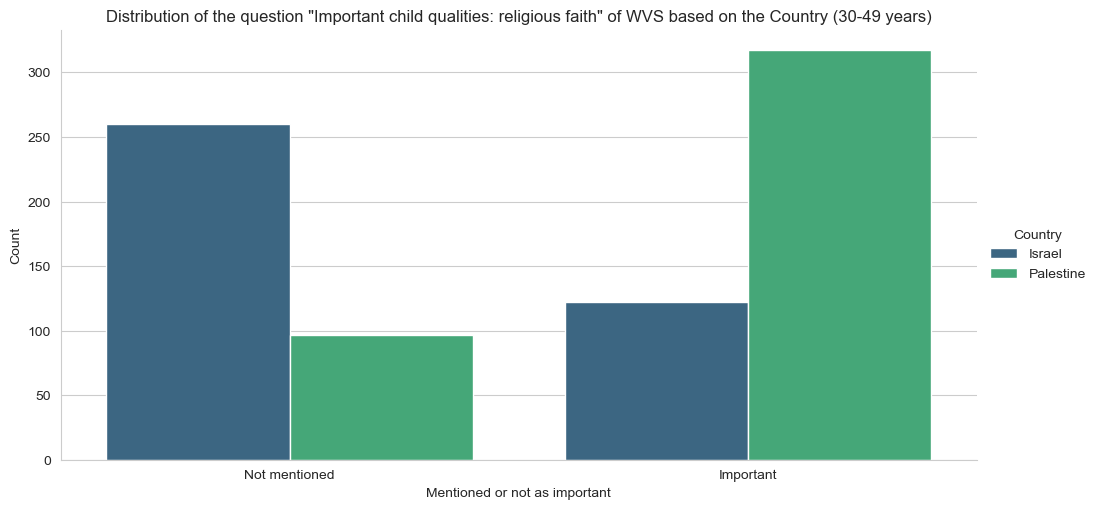

<Figure size 640x480 with 0 Axes>

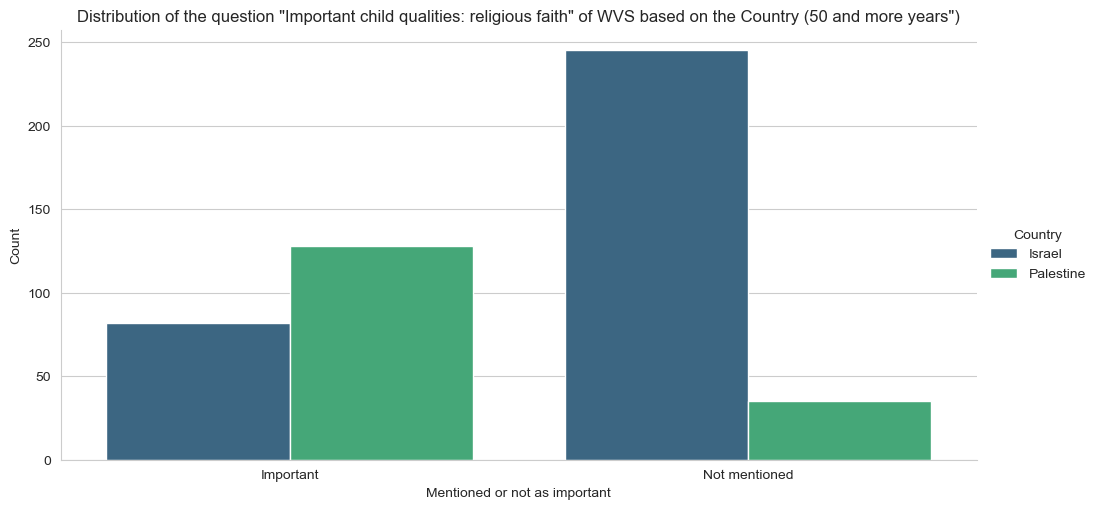

<Figure size 640x480 with 0 Axes>

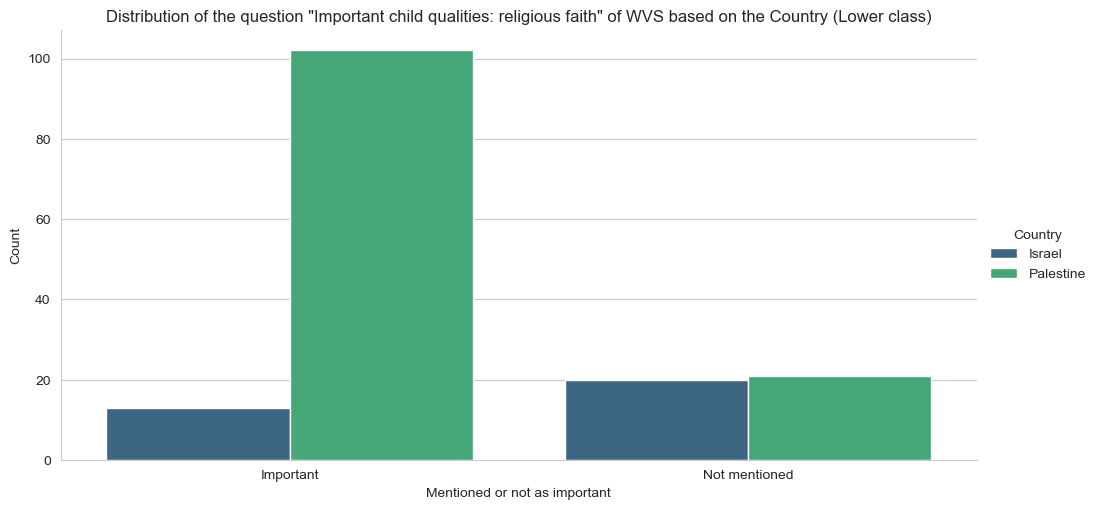

<Figure size 640x480 with 0 Axes>

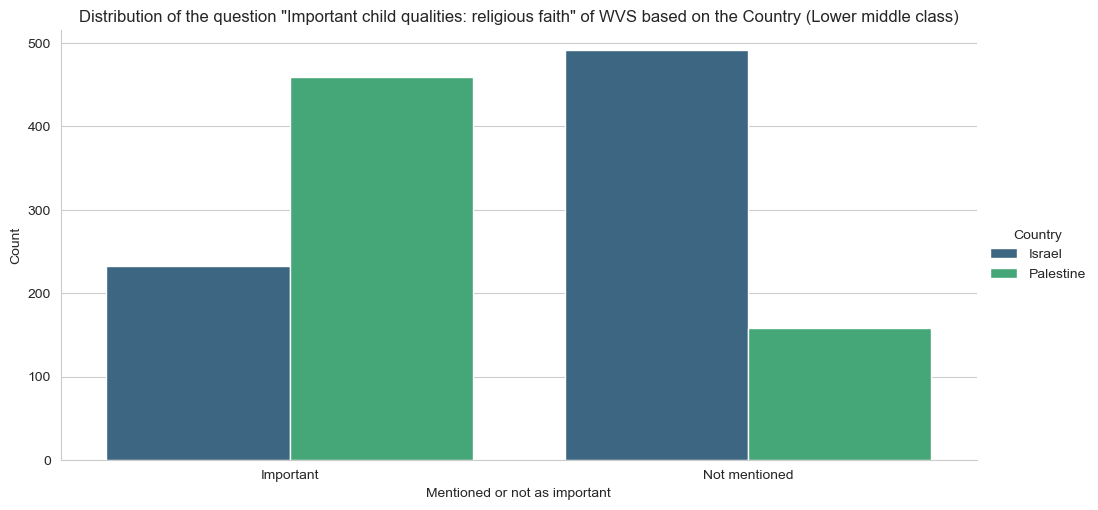

<Figure size 640x480 with 0 Axes>

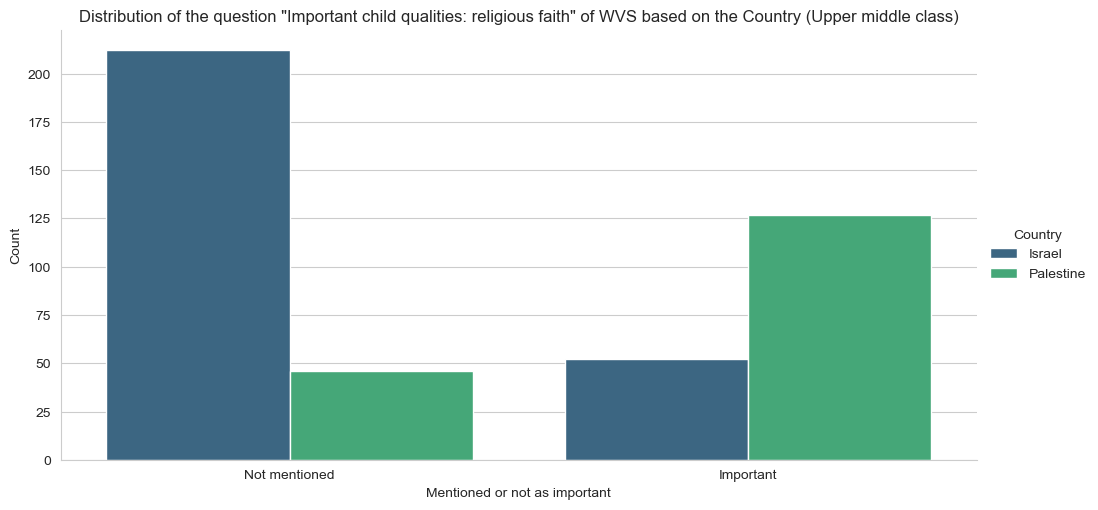

<Figure size 640x480 with 0 Axes>

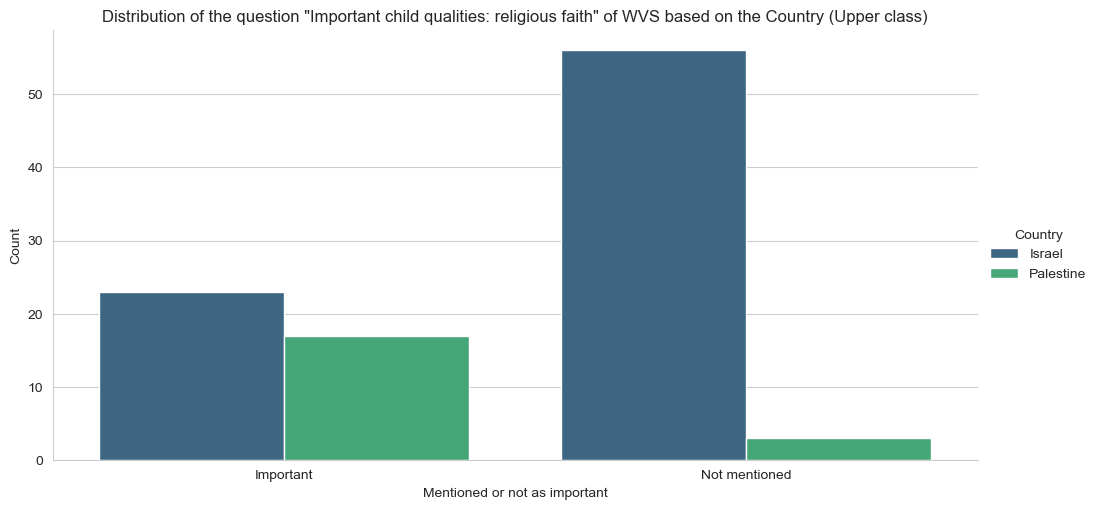

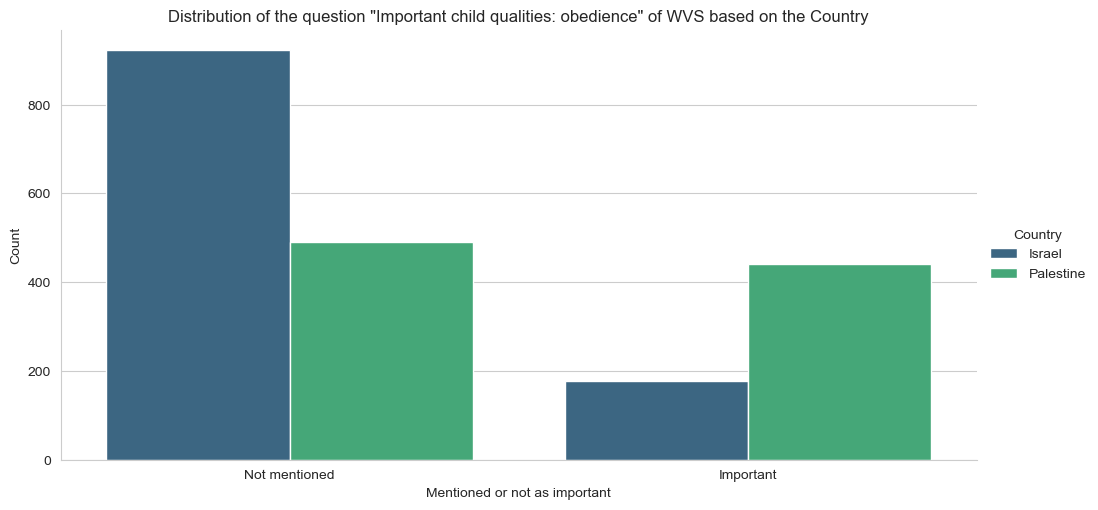

<Figure size 640x480 with 0 Axes>

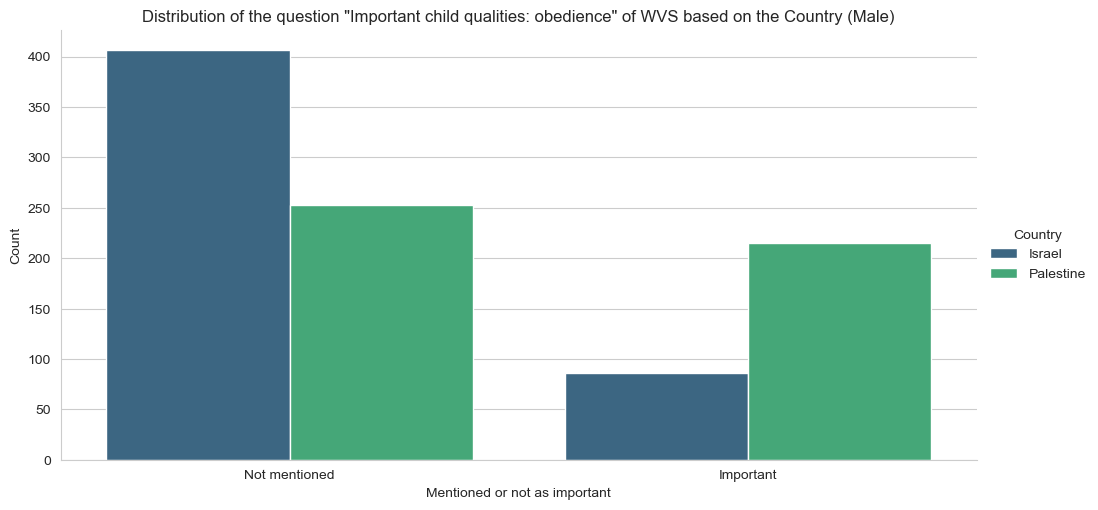

<Figure size 640x480 with 0 Axes>

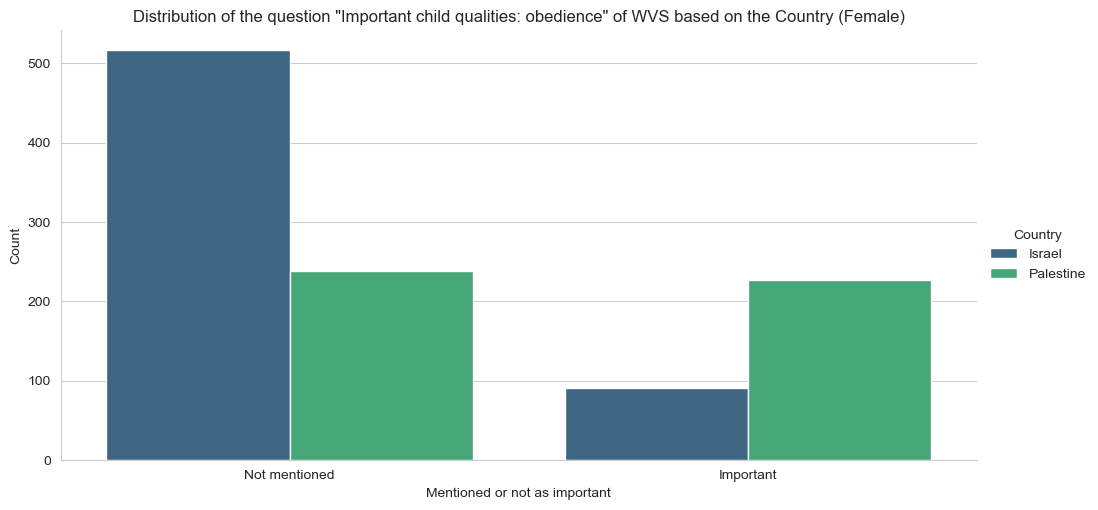

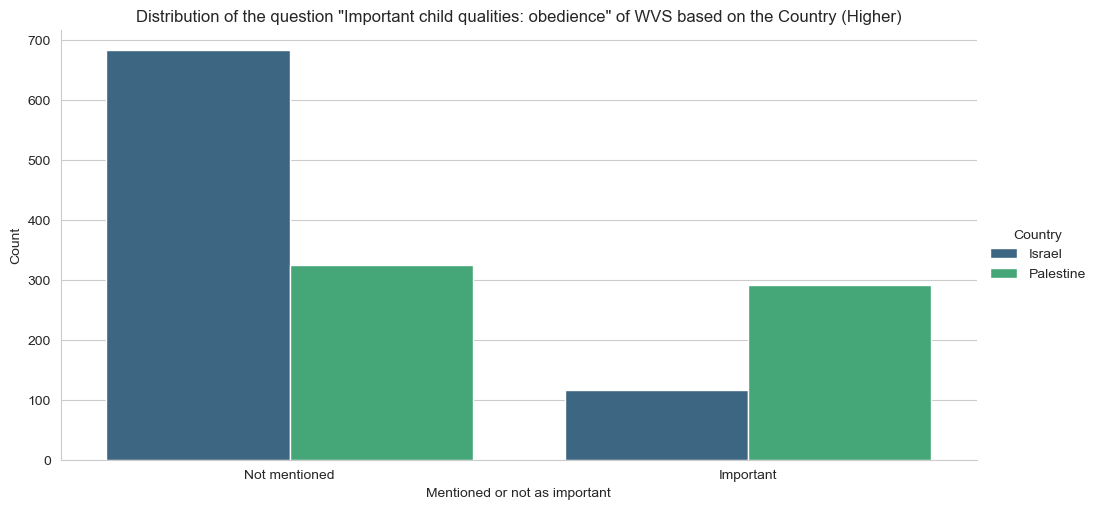

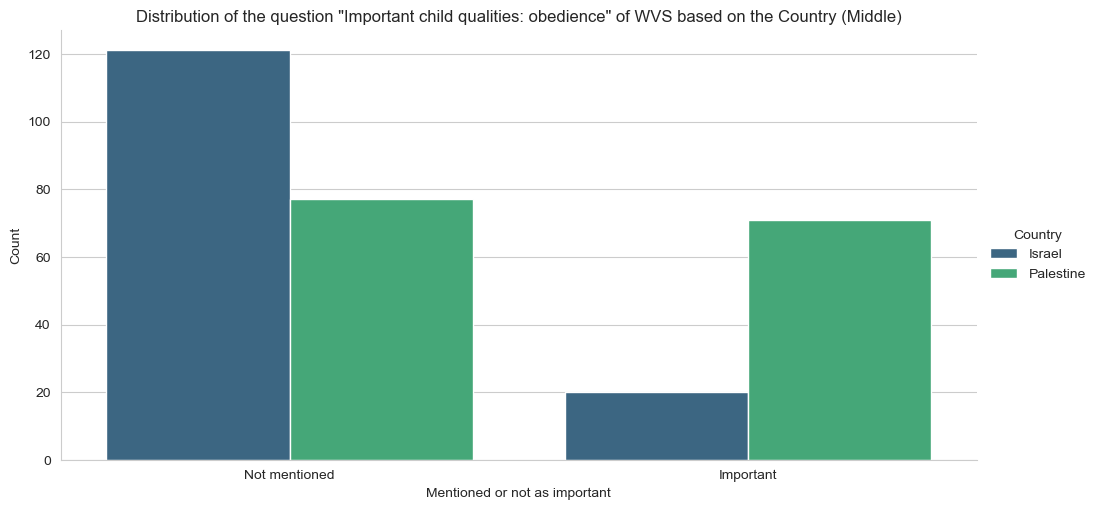

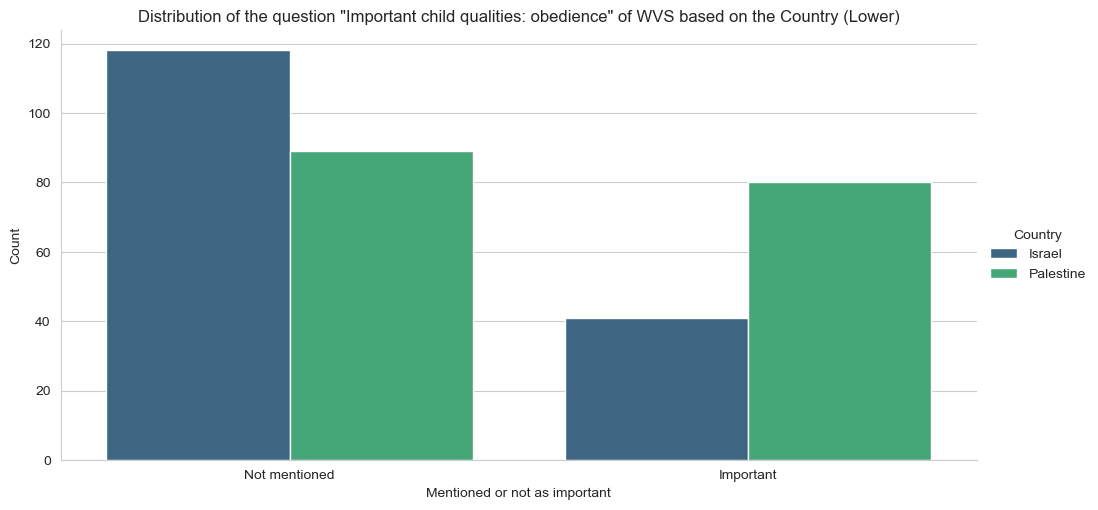

<Figure size 640x480 with 0 Axes>

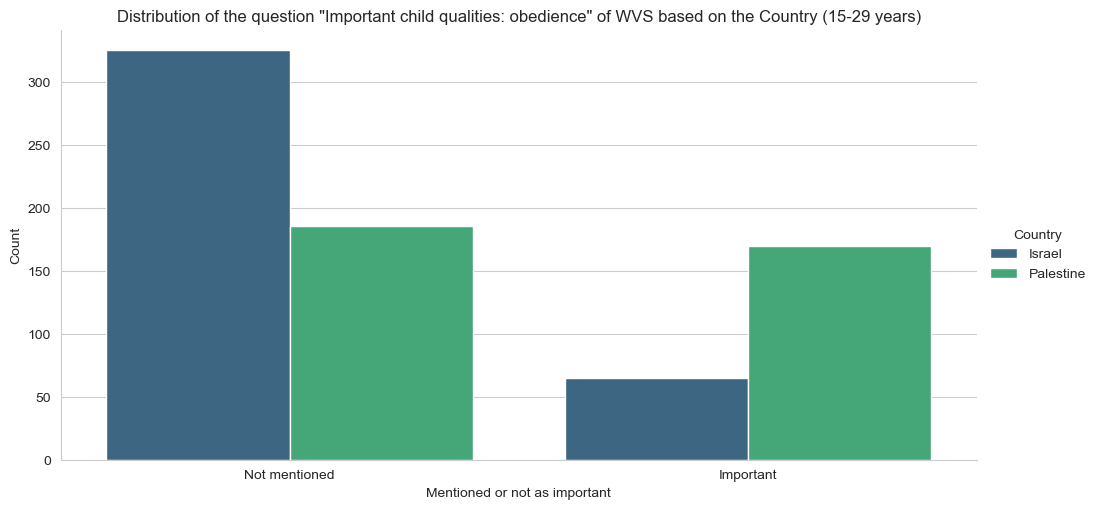

<Figure size 640x480 with 0 Axes>

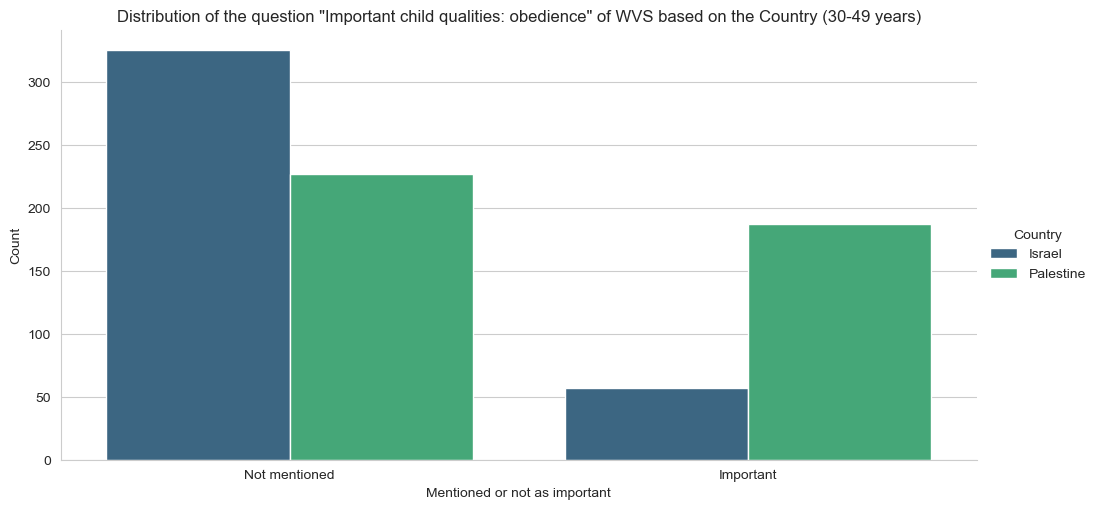

<Figure size 640x480 with 0 Axes>

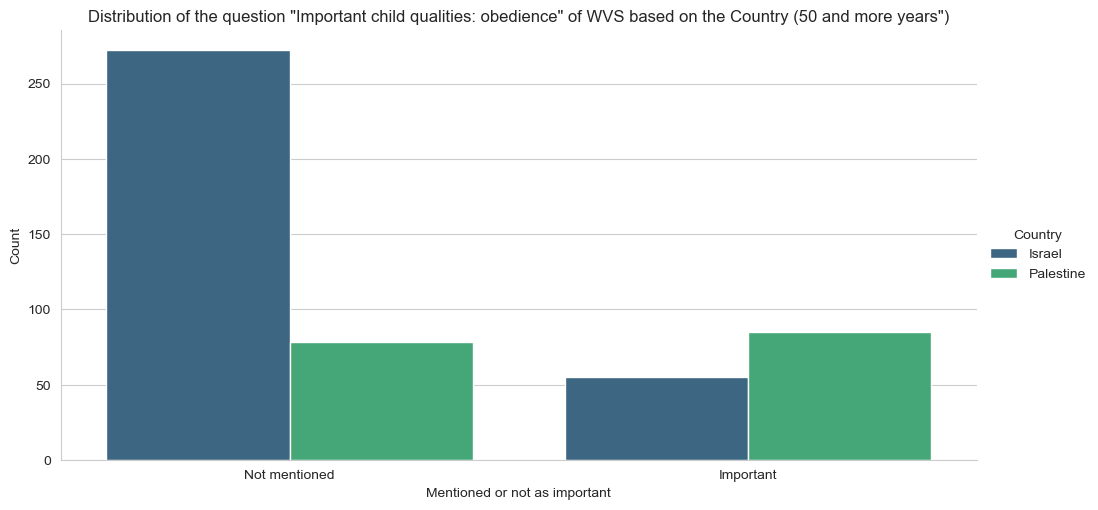

<Figure size 640x480 with 0 Axes>

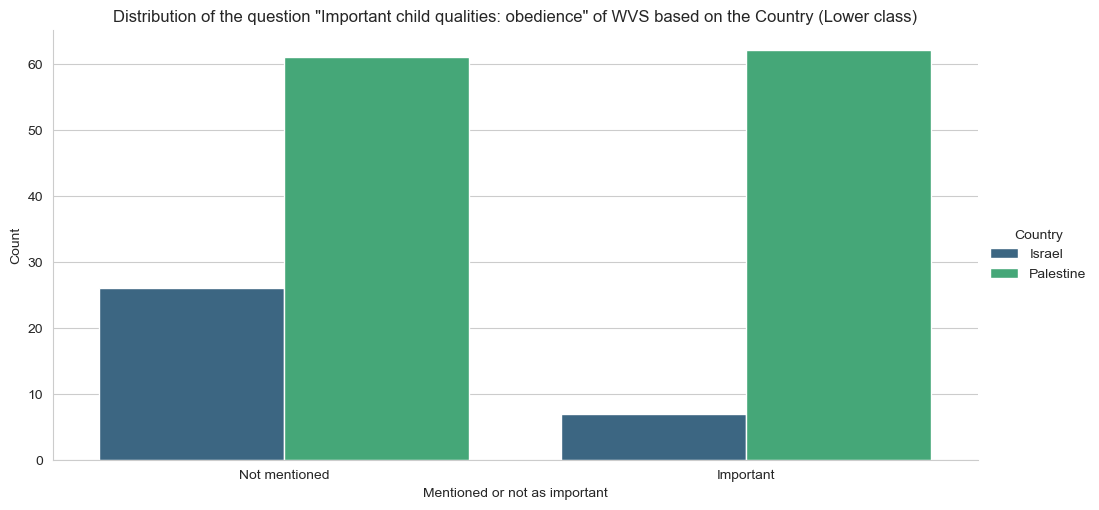

<Figure size 640x480 with 0 Axes>

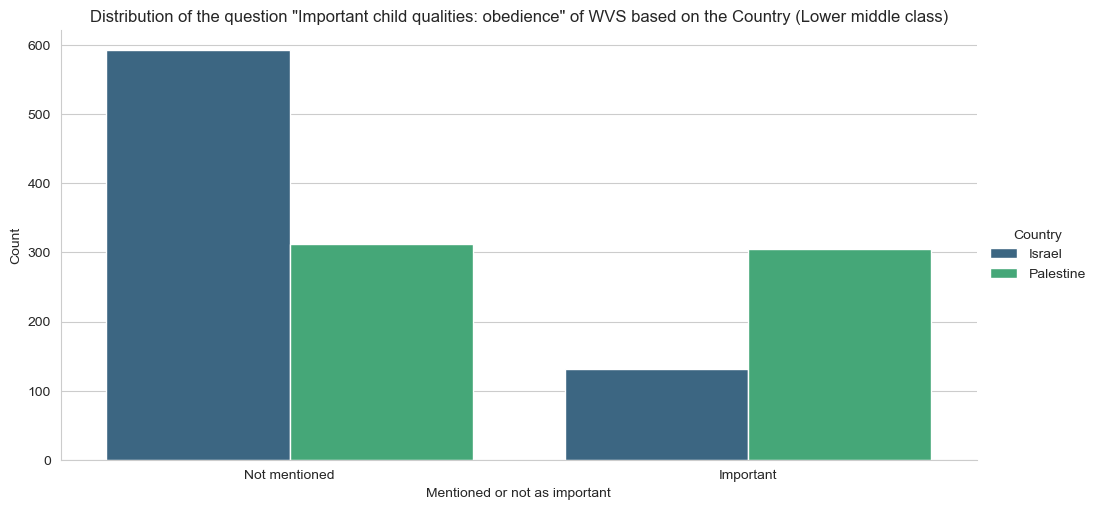

<Figure size 640x480 with 0 Axes>

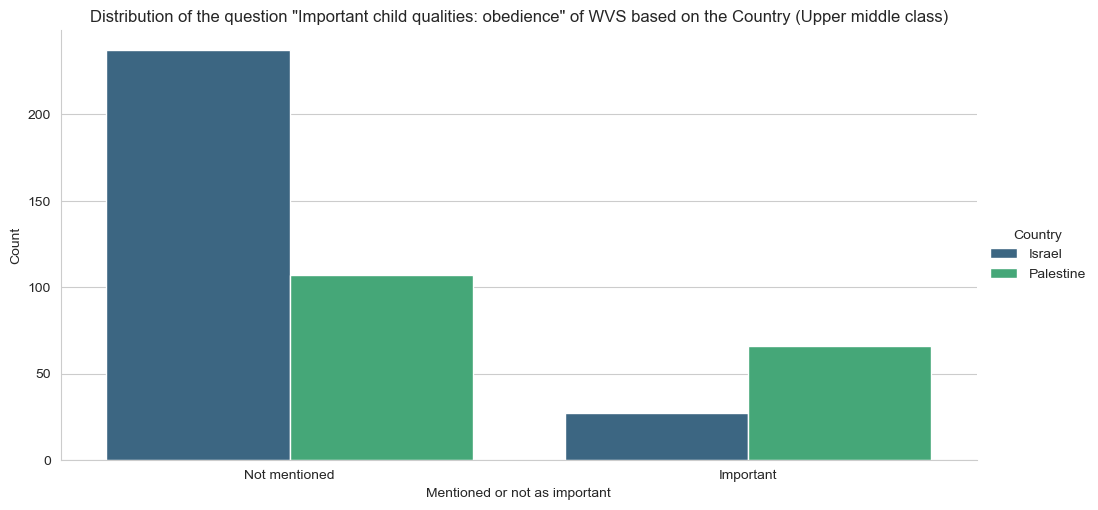

<Figure size 640x480 with 0 Axes>

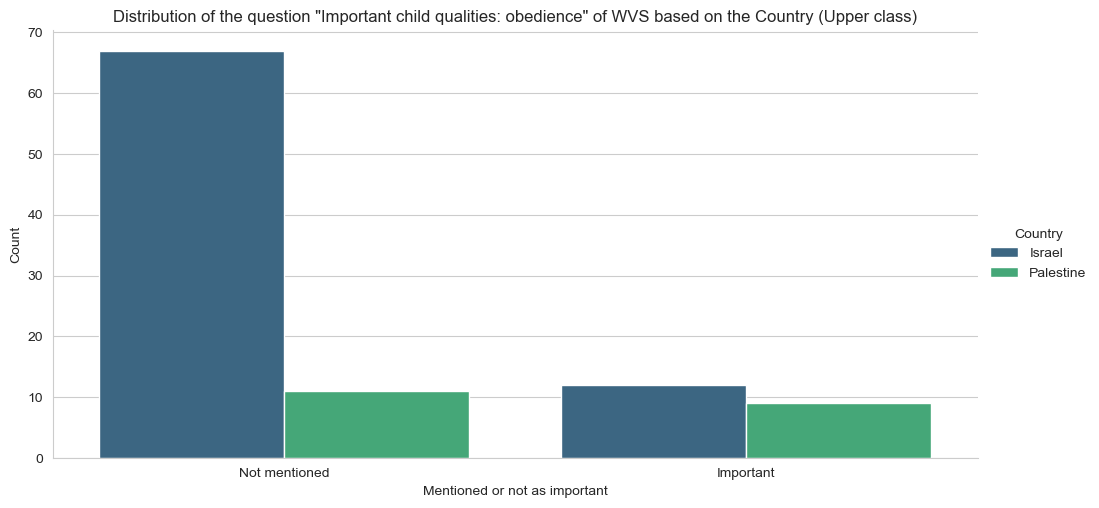

In [31]:
for col in ['Important child qualities: tolerance and respect for other people', 'Important child qualities: religious faith', 'Important child qualities: obedience']:
    
    sns.catplot(data=df, kind='count', x=col, hue='Country', palette='viridis', height=5, aspect=2)
    
    plt.title(f'Distribution of the question "{col}" of WVS based on the Country')
    plt.xlabel('Mentioned or not as important')
    plt.ylabel('Count')    
    
    
    plt.savefig(f'C:/Users/{user}/Downloads/{col}.png')
    plt.show()
    
    for sex in ['Male', 'Female']:
        df_plot = df[df['Sex'] == sex]
        
        plt.figure()
        sns.catplot(data=df_plot, kind='count', x=col, hue='Country', palette='viridis', height=5, aspect=2)
        
        plt.title(f'Distribution of the question "{col}" of WVS based on the Country ({sex})')
        plt.xlabel('Mentioned or not as important')
        plt.ylabel('Count')   
        
        #plt.ylim(0, len(df_plot)/2)
        
        plt.savefig(f'C:/Users/{user}/Downloads/{col}_{sex}.png')
        plt.show()

        
    for edu in ['Higher', 'Middle', 'Lower']:
        df_plot = df[df['Highest educational level attained'] == edu]
        
        sns.catplot(data=df_plot, kind='count', x=col, hue='Country', palette='viridis', height=5, aspect=2)
        
        plt.title(f'Distribution of the question "{col}" of WVS based on the Country ({edu})')
        plt.xlabel('Mentioned or not as important')
        plt.ylabel('Count')   

        #plt.ylim(0, len(df_plot)/2)
        
        plt.savefig(f'C:/Users/{user}/Downloads/{col}_{edu}.png')
        plt.show()

        
    for age in ['15-29 years', '30-49 years', '50 and more years"']:
        df_plot = df[df['Age group'] == age]
        
        plt.figure()
        sns.catplot(data=df_plot, kind='count', x=col, hue='Country', palette='viridis', height=5, aspect=2)
        
        plt.title(f'Distribution of the question "{col}" of WVS based on the Country ({age})')
        plt.xlabel('Mentioned or not as important')
        plt.ylabel('Count')   
        
        #plt.ylim(0, len(df_plot)/2)
        
        plt.savefig(f'C:/Users/{user}/Downloads/{col}_{age}.png')
        plt.show()

        
    for clase in ['Lower class', 'Lower middle class', 'Upper middle class', 'Upper class']:
        df_plot = df[df['Social class (subjective)'] == clase]
        
        plt.figure()
        sns.catplot(data=df_plot, kind='count', x=col, hue='Country', palette='viridis', height=5, aspect=2)
        
        plt.title(f'Distribution of the question "{col}" of WVS based on the Country ({clase})')
        plt.xlabel('Mentioned or not as important')
        plt.ylabel('Count')   
        
        #plt.ylim(0, len(df_plot)/2)
        
        plt.savefig(f'C:/Users/{user}/Downloads/{col}_{clase}.png')
        plt.show()

#### 4. Brief description of the data

Overall, Israelis appear to be more inclined towards gender equality and children’s independence than Palestinians, but they are still far from being similar to Western Europeans. We can also see an important polarization in some questions, with similar answers of 'Always justifiable' and 'Never justifiable'. 

Both Israelis and Palestinians show that younger, more educated participants and women are more inclined towards gender equality and children’s independence, corresponding to similar trends in other WVS countries.

The significant difference in both societies makes obvious the difficulties that successful cultural integration could face.